## Mục lục:
* [I. Giới thiệu Recurrent Neural Network (RNN) và sự cần thiết của thuật toán Backpropagation through time (BPTT)](#section-i)
    * [1. Neural Network](#section-i-1)
        * [1.1. Giới thiệu](#section-i-1-1)
        * [1.2. Hạn chế của Neural Network truyền thống với dữ liệu tuần tự theo thời gian](#section-i-1-2)
    * [2. Recurrent Neural Network (RNN)](#section-i-2)
        * [2.1. Dữ liệu tuần tự theo thời gian](#section-i-2-1)
        * [2.2. Tổng quan về Recurrent Neural Network (RNN)](#section-i-2-2)
    * [3. Vấn đề Backpropagation trong Recurrent Neural Network](#section-i-3)
        * [3.1 Thuật toán Backpropagation hoạt động không tốt trên Recurrent Neural Network](#section-i-3-1)
        * [3.2 Sự cần thiết của Backpropagation Through Time (BPTT)](#section-i-3-2)
* [II. Nền tảng Toán học của Lan truyền ngược qua thời gian](#section-ii)
    * [1. Nền tảng Toán học](#section-ii-1)
    * [2. Lan truyền ngược qua thời gian (Backpropagation Through Time - BPTT](#section-ii-2)
* [III. Full Computation - Backpropagation Through Time](#section-iii)
    * [1. Introduction to Full Computation in BPTT](#section-iii-1)
    * [2. RNN with Full BPTT Implementation](#section-iii-2)
    * [3. Visualization of Full BPTT](#section-iii-3)
    * [4. Demonstration of Gradient Behavior in Full BPTT](#section-iii-4)
    * [5. The Challenges of Full Computation](#section-iii-5)
    * [6. Memory Storage Visualization](#section-iii-6)
    * [7. Conclusion](#section-iii-7)
* [IV. Giải pháp và Các phương pháp huấn luyện khác](#section-iv)
    * [1. Giải pháp xử lý vanishing/exploding gradients bằng Truncated BPTT](#section-iv-1)
        * [1.1. Nguyên lý hoạt động](#section-iv-1-1)
        * [1.2. Ưu điểm của phương pháp trên](#section-iv-1-2)
        * [1.3. Ứng dụng thực tế](#section-iv-1-3)
        * [1.4. Hạn chế](#section-iv-1-4)
        * [1.5. Hiện thực](#section-iv-1-5)
    * [2. Giải pháp xử lý vanishing/exploding gradients bằng Truncated BPTT: Randomized Truncation](#section-iv-2)
        * [2.1. Nguyên lý hoạt động](#section-iv-2-1)
        * [2.2. Ưu điểm của Randomized Truncation](#section-iv-2-2)
        * [2.3. Hạn chế của Randomized Truncation](#section-iv-2-3)
        * [2.4. Ví dụ bài toán: Dự đoán giá trị trong chuỗi thời gian](#section-iv-2-4)
        * [2.5. Kế hoạch triển khai](#section-iv-2-5)
* [V. Gỉải bài tập](#section-v)
    * [1. Bài tập 1](#section-v-1-1)
        * [1.1. Bài tập 1a](#section-v-1-1)
        * [1.2. Bài tập 1b](#section-v-1-2)
        * [1.3. Bài tập 1c](#section-v-1-3)
    * [2. Bài tập 2](#section-v-2)
* [VI. Ứng dụng BPTT](#section-vi)
    * [1. Ứng dụng BPTT trong Language Modeling](#section-vi-1)
        * [1.1. Bài toán Language Modeling là gì?](#section-vi-1-1)
        * [1.2. Vì sao cần sử dụng RNN và BPTT?](#section-vi-1-2)
        * [1.3. Vai trò của BPTT trong huấn luyện Language Model](#section-vi-1-3)
    * [2. Ứng dụng BPTT trong Machine Translation](#section-vi-2)
        * [2.1. Mô hình dịch máy là gì?](#section-vi-2-1)
        * [2.2. Tại sao cần BPTT trong Machine Translation?](#section-vi-2-2)
* [Tài liệu tham khảo](#section-vi)




















# I. Giới thiệu Recurrent Neural Network (RNN) và sự cần thiết của thuật toán Backpropagation through time (BPTT) <a id="section-i"></a>

# 1. Neural Network <a id="section-i-1"></a>

## 1.1. Giới thiệu <a id="section-i-1-1"></a>

Neural Network là một mô hình học máy mô phỏng hoạt động tương tự hệ thần kinh của con người. Neural Network bao gồm các lớp neuron liên kết với nhau bằng các trọng số, với cơ chế hoạt động:

- Nhận đầu vào (input).
- Tính toán tổng có trọng số + bias.
- Áp dụng hàm kích hoạt (activation function).
- Xuất ra giá trị dự đoán (output).

Trong quá trình huấn luyện, thuật toán **Backpropagation** được sử dụng để cập nhật trọng số của mạng, sao cho đầu ra tiệm cận giá trị mong muốn.

Ví dụ mô hình đơn giản:

- Input → Hidden Layer → Output Layer

<!-- <center><img src="images/neural-network.png"/></center> -->

<center>
<figure>
<img src="images/neural-network.png" style="width:50%">
<figcaption align = "center"> Mô hình Neural Network đơn giản </figcaption>
Nguồn: <a href="https://www.cloudflare.com/learning/ai/what-is-neural-network/" target="_blank">Cloudflare. What is a Neural Network?</a>
</figure>
</center>

## 1.2. Hạn chế của Neural Network truyền thống với dữ liệu tuần tự theo thời gian <a id="section-i-1-2"></a>

Neural Network truyền thống chỉ có thể xử lý thông tin theo một chiều từ Input → Output. Công thức chung:
$$
\mathbf{h}^{(l)} = \sigma(\mathbf{W}^{(l)} \mathbf{h}^{(l-1)} + \mathbf{b}^{(l)})
$$

Trong đó:
- $\mathbf{h}^{(l)}$ là vector output tầng $l$.
- $\mathbf{W}^{(l)}$, $\mathbf{b}^{(l)}$ là ma trận trọng số và bias.
- $\sigma$ là hàm kích hoạt (ReLU, tanh, sigmoid...).

Chính vì thông tin chỉ đi được một chiều mà không thể quay lại (do không có vòng lặp), các input tại các node không thể nhớ thông tin nào từ trước. Bên cạnh đó, nếu xử lý nhiều input, thì các input này cũng được xử lý độc lập và không biết giá trị trước sau. Cụ thể:

- Giả sử với chuỗi input:
$$
\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \ldots, \mathbf{x}_T
$$

- Với Neural Network truyền thống:
$$
\mathbf{y}_t = f(\mathbf{x}_t)
$$

- Nhưng thực tế cần xử lý tuần tự:
$$
\mathbf{y}_t = f(\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_t)
$$


Trong thực tế, rất nhiều bài toán trong thực tế đòi hỏi mô hình phải "nhớ" được các dữ liệu trong quá khứ, liên kết chúng lại và dự đoán giá trị output. Chẳng hạn như các bài toán sau đều không thể chỉ xử lý từng input đơn lẻ mà cần xem xét chuỗi các input liên tiếp:
- **Dịch máy (Machine Translation):** Nghĩa của một từ phụ thuộc vào các từ trước đó.
- **Dự đoán giá cổ phiếu:** Giá hiện tại bị ảnh hưởng bởi xu hướng giá trước đó.
- **Nhận diện giọng nói:** Âm thanh ở thời điểm hiện tại phụ thuộc ngữ cảnh âm thanh trước đó.
- **Chatbot hội thoại:** Câu trả lời hiện tại phải dựa trên lịch sử đoạn hội thoại.

Tóm lại, Neural Network truyền thống được thiết kế để xử lý các dữ liệu đầu vào độc lập, không có mối liên kết theo thời gian giữa các bước. Mô hình sẽ hoạt động hiệu quả khi dữ liệu đầu vào đã hoàn chỉnh và không mang tính chuỗi như trong các bài toán phân loại, hồi quy. Tuy nhiên, với dữ liệu tuần tự, phụ thuộc vào các thông tin trước đó, Neural Network hoàn toàn không có cơ chế ghi nhớ trạng thái hay ngữ cảnh. Chính vì thế, Recurrent Neural Networks (RNN) ra đời, với cơ chế hidden state được cập nhật liên tục qua mỗi bước thời gian, cho phép mô hình có thể lưu trữ và khai thác thông tin từ quá khứ, phục vụ cho việc xử lý chuỗi dữ liệu một cách tự nhiên và hiệu quả hơn.

# 2. Recurrent Neural Network (RNN) <a id="section-i-2"></a>
## 2.1. Dữ liệu tuần tự theo thời gian <a id="section-i-2-1"></a>

Trong nhiều bài toán thực tế, dữ liệu không chỉ đơn thuần độc lập mà còn mang bản chất tuần tự. Tức là, giá trị tại thời điểm hiện tại không tồn tại riêng lẻ, mà chịu ảnh hưởng bởi những dữ liệu xảy ra trước đó. Hiểu một cách đơn giản, để đưa ra quyết định ở thời điểm hiện tại, mô hình cần phải xem xét không chỉ dữ liệu hiện tại mà còn cả lịch sử các sự kiện trước đó.

Chẳng hạn về dữ liệu tuần tự trong xử lý ngôn ngữ tự nhiên (NLP), khi đọc một câu văn, việc hiểu nghĩa của một từ phụ thuộc rất nhiều vào các từ đi trước. Ví dụ:
  - Câu: `"Hôm nay trời rất ___."`
    - Nếu các từ trước đó là `"Hôm nay trời rất"`, thì từ tiếp theo hợp lý có thể là `"đẹp"`, `"nắng"`, `"mát"`,...
    - Nếu chỉ nhìn từ `"rất"`, sẽ không thể đoán chính xác được ý nghĩa mong muốn.


Để có thể xử lý loại dữ liệu trên, một mô hình cần có các đặc điểm sau:

- **Tiếp nhận một đầu vào tại mỗi thời điểm**:  
   - Ví dụ: một từ trong câu, một ảnh từ camera, một giá trị cảm biến đo được.

- **Cập nhật trạng thái ẩn (hidden state)**:  
   - Trạng thái ẩn đóng vai trò là bộ nhớ, lưu giữ những thông tin quan trọng từ các thời điểm trước. 
   - Hidden state được cập nhật dựa trên đầu vào hiện tại kết hợp với trạng thái trước đó.

- **Sinh ra đầu ra tương ứng**:  
   - Output tại thời điểm hiện tại có thể phụ thuộc không chỉ vào input hiện tại mà còn phụ thuộc vào toàn bộ lịch sử các input trước.

## 2.2. Tổng quan về Recurrent Neural Network (RNN) <a id="section-i-2-2"></a>

Recurrent Neural Network (RNN) được thiết kế để xử lý dữ liệu tuần tự bằng cách giới thiệu trạng thái ẩn (hidden state) để lưu trữ thông tin về các input trước đó.

Tại mỗi bước thời gian $t$, RNN thực hiện các bước sau:
- Nhận đầu vào $\mathbf{X}_t$,
- Kết hợp đầu vào hiện tại $\mathbf{X}_t$ và trạng thái ẩn từ bước trước $\mathbf{H}_{t-1}$,
- Cập nhật trạng thái ẩn $\mathbf{H}_t$,
- Sinh ra đầu ra $\mathbf{O}_t$ dựa trên trạng thái ẩn $\mathbf{H}_t$.

Cập nhật trạng thái ẩn:
$$
\mathbf{H}_t = \varphi(\mathbf{X}_t \mathbf{W}_{xh} + \mathbf{H}_{t-1} \mathbf{W}_{hh} + \mathbf{b}_h)
$$

Trong đó:
- $\mathbf{X}_t \in \mathbb{R}^{n \times d}$: Input tại thời điểm $t$ (vector hoặc batch).
- $\mathbf{H}_t \in \mathbb{R}^{n \times h}$: Hidden state tại thời điểm $t$.
- $\mathbf{W}_{xh} \in \mathbb{R}^{d \times h}$: Trọng số từ input đến hidden.
- $\mathbf{W}_{hh} \in \mathbb{R}^{h \times h}$: Trọng số từ hidden trước tới hidden hiện tại.
- $\mathbf{b}_h \in \mathbb{R}^{1 \times h}$: Bias cho hidden state.
- $\varphi$: Hàm kích hoạt (thường là tanh hoặc ReLU).

Output sinh ra:
$$
\mathbf{O}_t = \mathbf{H}_t \mathbf{W}_{hq} + \mathbf{b}_q
$$

Trong đó:
- $\mathbf{O}_t \in \mathbb{R}^{n \times q}$: Output tại thời điểm $t$.
- $\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$: Trọng số từ hidden đến output.
- $\mathbf{b}_q \in \mathbb{R}^{1 \times q}$: Bias cho output.

Lưu ý rằng, với mô hình ở các bước thời gian khác nhau, trọng số và bias là giống nhau. Chính vì thế, khi số lượng bước thời gian tăng lên, mô hình không cần thêm tham số mới, đảm bảo kích thước mô hình cố định bất kể độ dài của chuỗi đầu vào.

<center>
<figure>
<img src="images/rnn.png" style="width:50%">
<figcaption align = "center"> Ví dụ về Recurrent Neural Network đơn giản </figcaption>
Nguồn: <a href="https://towardsdatascience.com/a-brief-introduction-to-recurrent-neural-networks-638f64a61ff4/" target="_blank">Malik, A. A Brief Introduction to Recurrent Neural Networks</a>
</figure>
</center>



# 3. Vấn đề Backpropagation trong Recurrent Neural Network <a id="section-i-3"></a>

Trong Neural Network truyền thống, quá trình học sử dụng thuật toán backpropagation đơn giản, chỉ lan truyền lỗi ngược qua từng lớp, từ đầu ra về đầu vào. Thêm nữa, các trọng số cũng riêng biệt ở mỗi lớp, dữ liệu được xử lý độc lập, không có yếu tố thời gian. Tuy nhiên, trong mạng RNN, vì mô hình xử lý dữ liệu tuần tự theo thời gian, và trọng số được chia sẻ qua các bước thời gian nên quá trình tính toán gradient phải lan truyền ngược lại không chỉ qua các lớp mà còn xuyên suốt qua các bước thời gian. Phương pháp lan truyền lỗi ngược này được gọi là **Backpropagation Through Time (BPTT)**.

## 3.1 Thuật toán Backpropagation hoạt động không tốt trên Recurrent Neural Network <a id="section-i-3-1"></a>

Khi áp dụng trực tiếp backpropagation cho RNN, xuất hiện hai vấn đề lớn do tính chất của chuỗi thời gian:

**(1) Vanishing Gradient**
- Khi gradient được truyền ngược qua rất nhiều bước thời gian, mỗi bước đều nhân với ma trận trọng số và đạo hàm của hàm kích hoạt.
- Nếu giá trị của đạo hàm hoặc giá trị của trọng số nhỏ hơn 1, việc nhân liên tục qua nhiều bước sẽ làm cho gradient giảm dần về 0.
- Hậu quả:
  - Các trọng số liên quan đến các bước thời gian xa hầu như không được cập nhật.
  - Mô hình không học được mối quan hệ dài hạn trong dữ liệu (long-term dependencies).
- Ví dụ:
  - Khi dịch một câu quá dài, mô hình không thể nhớ những từ đầu tiên, dẫn đến bản dịch mất ngữ cảnh.

**(2) Exploding Gradient**
- Ngược lại, nếu giá trị của đạo hàm hoặc giá trị của trọng số lớn hơn 1, việc nhân liên tục qua nhiều bước sẽ làm cho gradient tăng cực nhanh.
- Gradient trở nên rất lớn, dẫn đến:
  - Quá trình cập nhật trọng số trở nên mất kiểm soát,
  - Quá trình huấn luyện dao động mạnh, thậm chí gây lỗi overflow hoặc NaN.
- Ví dụ:
  - Mô hình đưa ra các dự đoán vô nghĩa, nhảy lung tung, hoặc không hội tụ trong quá trình huấn luyện.


## 3.2 Sự cần thiết của Backpropagation Through Time (BPTT) <a id="section-i-3-2"></a>

Trong quá trình mô hình được huấn luyện từ dữ liệu tuần tự, tại mỗi thời điểm $t$, mô hình không chỉ cần xử lý dữ liệu đầu vào mới $\mathbf{X}_t$, mà còn phải cập nhật trạng thái ẩn dựa trên thông tin hiện tại và trạng thái tích lũy từ các bước thời gian trước đó. Việc duy trì và cập nhật trạng thái ẩn liên tục theo thời gian là yếu tố then chốt để mô hình có thể học được quan hệ dài hạn của chuỗi dữ liệu. Khi mô hình cần cập nhật bộ tham số, việc tính toán gradient được thực hiện xuyên suốt chuỗi thời gian thay vì chỉ qua các lớp như trong mạng feedforward truyền thống. Điều này nhằm đảm bảo rằng thông tin từ quá khứ không bị "quên" và mối quan hệ theo thời gian được học một cách hiệu quả. Tuy nhiên, việc lan truyền gradient qua nhiều bước thời gian liên tiếp lại gây ra những vấn đề nghiêm trọng là vanishing gradient và exploding gradient như đã đề cập phía trên. Từ đó, khiến mô hình bị mất những thông tin đầu tiên khi input quá dài, hoặc mô hình dự đoán vô nghĩa. Chính vì vậy, việc huấn luyện RNN yêu cầu một kỹ thuật đặc biệt được gọi là Backpropagation Through Time (BPTT), cho phép mở rộng mạng RNN theo thời gian và tính toán gradient chính xác trên toàn bộ chuỗi.

# II. Nền tảng Toán học của Lan truyền ngược qua thời gian <a id="section-ii"></a>

## Nền tảng Toán học <a id="section-ii-1"></a>

### The Backpropagation algorithm 

1. Initialize all weights $w_{ji}$ to small random values.

2. Repeat until convergence (or for a fixed number of epochs):

   For each training example $(\mathbf{x}, \mathbf{t})$:

   1. **Forward Pass**  
      Input the training example to the network and compute the outputs $o_k$.

   2. **Compute Output Error**  
      For each output unit $k$:
      $$
      \delta_k \leftarrow o_k (1 - o_k)(t_k - o_k) \tag{1}
      $$

   3. **Compute Hidden Layer Error**  
      For each hidden unit $h$:
      $$
      \delta_h \leftarrow o_h (1 - o_h) \sum_{k \in \text{outputs}} w_{kh} \delta_k \tag{2}
      $$

   4. **Update Weights**  
      For each weight $w_{ji}$:
      $$
      \Delta w_{ji} \leftarrow \eta \, \delta_j \, x_{ji} \tag{3}
      $$
      $$
      w_{ji} \leftarrow w_{ji} + \Delta w_{ji} \tag{4}
      $$


#### Derivation of the Backpropagation Rule

$$
E_d(\vec{w}) = \frac{1}{2}(t_d - o_d)^2 \tag{1}
$$

Stochastic gradient descent involves iterating through the training examples one at a time.  
In other words, for each training example $d$, every $w_{ji}$ is updated by adding to it $\Delta w_{ji}$:

$$\Delta w_{ji} = -\eta \frac{\partial E_d}{\partial w_{ji}} \tag{2}$$

where $E_{d}$ is the error on training example $d$, summed over all ouput units.

$$
E_d(\vec{w}) \equiv \frac{1}{2} \sum_{k \in \text{outputs}} (t_k - o_k)^2 \tag{3}
$$

To begin, notice that weight $w_{ji}$ can influence the rest of the network through $net_{j}$. So, we can use the chain rule to write:
$$
\frac{\partial E_d}{\partial w_{ji}} = \frac{\partial E_d}{\partial \text{net}_j} \frac{\partial \text{net}_j}{\partial w_{ji}} = \frac{\partial E_d}{\partial \text{net}_j} x_{ji} \tag{4}
$$
Now our remaining task is to derive a convenient expression for $\frac{\partial E_d}{\partial \text{net}_j}$.

We consider two cases: (1) the case where unit $j$ is an output unit and (2) the case where $j$ is an internal unit.

**(1) Training rule for output unit weights.**

Just as $w_{ji}$ can influence the rest of the network only through $net_j$, $net_j$ can influence the network only through $o_j$. So, we can use the chain rule again to write:

$$\frac{\partial E_d}{\partial \text{net}_j} = \frac{\partial E_d}{\partial \text{o}_j} \frac{\partial \text{o}_j}{\partial \text{net}_j} \tag{5}$$

$$\frac{\partial E_d}{\partial \text{o}_j} = \frac{\partial}{\partial \text{o}_j} \frac{1}{2} \sum_{k \in \text{outputs}} (t_k - o_k)^2 \tag{6}$$

The derivatives in the right hand side will be zero for all output units $k$ except when $k = j$.

We have:
$$\frac{\partial E_d}{\partial \text{o}_j} = \frac{\partial}{\partial \text{o}_j} \frac{1}{2} (t_j - o_j)^2$$
$$= \frac{1}{2} 2 (t_j - o_j) \frac{\partial (t_j - o_j)}{\partial o_j}$$
$$= - (t_j - o_j) \tag{7}$$

Next consider the second term in Equation (5). Since oj = $\partial (net_j)$, the derivative $\frac {o_j}{net_j}$ is just the derivative of the sigmod function, which we have already noted is equal to $\sigma (net_j)(1- \sigma(net_j))$. Therefore,

$$\frac{\partial o_j}{\partial \text{net}_j} = \frac{\partial \sigma (net_j)}{\partial \text{net}_j}$$
$$= o_j(1-o_j) \tag{8}$$

Substituting expressions (7) and (8) into (5), we obtain:

$$\frac{\partial E_d}{\partial \text{net}_j} = - (t_j - o_j)o_j(1-o_j) \tag{9}$$

And combining this with Equation (2) and (4), we have the stochastic gradient descent rule for output units
$$\Delta w_{ji} = -\eta \frac{\partial E_d}{\partial w_{ji}} = \eta(t_j - o_j)o_j(1-o_j) \tag{10}x_{ji}$$

This training rule is exactly the weight update rule, implemented by Equation (1) and (2) in the Backpropagation algorithm. Furthermore, we can see that $\delta_k$ in Equation(2) is equal to the quantity - $\frac {\partial E_d}{\partial net_k}$.

**(2) Training rule for Hidden Unit Weights**

In the case where $j$ is a hidden unit in the network, the derivation of the training rule for $w_{ji}$ must take into account the indirect ways in which $w_{ji}$ can influence the network outputs and hence $E_d$.
For this reason, we will find it useful to refer to the set of all units immediately downstream of unit $j$ in the network. We denote this set of units by Downstream(j).
Notice that $net_j$ can influence the network outputs (and therefore $E_d$) only through the units in Downstream(j). Therefore, we can write:

$$\frac{\partial E_d}{\partial \text{net}_j} = \sum_{k \in \text{Downstream(j)}} \frac{\partial E_d}{\partial \text{net}_k} \frac{\partial net_k}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k \frac{\partial net_k}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k \frac{\partial net_k}{\partial \text{o}_j} \frac{\partial o_j}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k w_{kj} \frac{\partial o_j}{\partial \text{net}_j}$$
$$= \sum_{k \in \text{Downstream(j)}} -\delta_k w_{kj} o_j(1-o_j)$$

Rearranging terms and using $\delta_j$ to denote - $\frac {\partial E_d}{\partial net_j}$, we have:
$$\delta_j = o_j(1-o_j) \sum_{k \in \text{Downstream(j)}} \delta_k w_{kj}$$
, and:
$$\Delta w_{ji} = \eta \delta_i x_{ji}$$


The **RNN** has three sets of parameters (or weights), shared across all time steps:

- **$U$**: Transforms the input $x_t$ into the state $s_t$  
- **$W$**: Transforms the previous state $s_{t-1}$ into the current state $s_t$  
- **$V$**: Maps the newly computed internal state $s_t$ to the output $y_t$  

$U$, $V$, and $W$ apply **linear transformations** over their respective inputs. The most basic form of such a transformation is the familiar **fully connected (FC)** operation. Therefore, $U$, $V$, and $W$ are **weight matrices**.

We can now define the internal state and the RNN output as:

$$
s_t = f(s_{t-1} W + x_t U)
$$

$$
y_t = s_t V
$$


We can **stack multiple RNNs** to form a **stacked RNN** (also known as a multi-layer RNN).

In this structure, the **cell state** $ s_t^l $ of an RNN cell at **level $ l $** and **time $ t $** takes as input:

- the **output** $ y_t^{l-1} $ from the RNN cell at the **previous level $ l-1 $**, and  
- the **previous state** $ s_{t-1}^l $ of the cell at the **same level $ l $**.

This can be expressed as:
$$
s_t^l = f(s_{t-1}^l, y_t^{l-1})
$$

- One-to-one, One-to-many, Many-to-one, Many-to-many (indirect and direct).

## Lan truyền ngược qua thời gian (Backpropagation Through Time - BPTT) <a id="section-ii-2"></a>

The recurrence relation defined by this RNN is $s_t = f(s_{t-1} W + x_t U)$. Note that this is a linear model since we don’t apply a non-linear function in this formula. The states, $s_t$, and the weights, $W$ and $U$, are single scalar values. $x_t$ represents a single element of the input sequence (one or zero). Set $U=1$, then whenever input is received, we will get its full value. Set $W=1$, then the value we would accumulate would never decay.



In [1]:
import numpy as np
# The first dimension represents the mini-batch
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])

def step(s_t, x_t, U, W):
    return x_t * U + s_t * W

def forward(x, U, W):
    # Number of samples in the mini-batch
    number_of_samples = len(x)
    # Length of each sample
    sequence_length = len(x[0])
    # Initialize the state activation for each sample along the sequence
    s = np.zeros((number_of_samples, sequence_length + 1))
    # Update the states over the sequence
    for t in range(0, sequence_length):
        s[:, t + 1] = step(s[:, t], x[:, t], U, W) # step function
    return s

First, we need to compute the **gradient of the output** \( s_t \) with respect to the **loss function** \( J \), denoted as $ \frac{\partial J}{\partial s_t} $.

Once we have this gradient, we **propagate it backward** through the stack of hidden states (activities) that were constructed during the forward pass. In this **backward pass**, we sequentially "pop" the stored activities and **accumulate their error derivatives** at each time step.

The **recurrence relation** for propagating this gradient through time in an RNN—using the **chain rule**—can be written as:

$$
\frac{\partial J}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot \frac{\partial s_t}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot W
$$

The **gradients of the weights** \( U \) and \( W \) in an RNN are **accumulated over all time steps** as follows:

$$
\frac{\partial J}{\partial U} = \sum_{t=0}^{n} \frac{\partial J}{\partial s_t} \cdot x_t
$$

$$
\frac{\partial J}{\partial W} = \sum_{t=0}^{n} \frac{\partial J}{\partial s_t} \cdot s_{t-1}
$$



In [2]:
def backward(x, s, y, W):
    sequence_length = len(x[0])
    # The network output is just the last activation of sequence
    s_t = s[:, -1]
    # Compute the gradient of the output w.r.t. MSE cost function at final state
    gS = 2 * (s_t - y)
    # Set the gradient accumulations to 0
    gU, gW = 0, 0
    # Accumulate gradients backwards
    for k in range(sequence_length, 0, -1):
        # Compute the parameter gradients and accumulate the results.
        gU += np.sum(gS * x[:, k - 1])
        gW += np.sum(gS * s[:, k - 1])
        # Compute the gradient at the output of the previous layer
        gS = gS * W
    return gU, gW


Use gradient descent to optimize our RNN. Compute the gradients (using MSE) with the help of the backward function and use them to update the weights value.

The gradient descent update rule is:

$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta)
$$

**Where:**

- $ \theta $: The parameter (or vector of parameters) we are trying to optimize.  
- $ \eta $: The learning rate (a small positive scalar).  
- $ J(\theta) $: The loss function (or objective function) we want to minimize.  
- $ \nabla_\theta J(\theta) $: The gradient of the loss function with respect to \( \theta \).

At each step:

* Compute the gradient $\nabla_{\theta} J(\theta)$, which shows the direction of steepest **increase**.
* Subtract this gradient, scaled by $\eta$, to move in the direction of steepest **decrease** (i.e., minimize the function).

$$
U = U - \eta \cdot \frac{\partial L}{\partial U}
$$

$$
W = W - \eta \cdot \frac{\partial L}{\partial W}
$$


In [5]:
def train(x, y, epochs, learning_rate=0.0005):
    """Train the network"""

    # Set initial parameters
    weights = (-2, 0)  # (U, W)

    # Accumulate the losses and their respective weights
    losses, gradients_u, gradients_w = list(), list(), list()

    # Perform iterative gradient descent
    for i in range(epochs):
        # Perform forward and backward pass to get the gradients
        s = forward(x, weights[0], weights[1])

        # Compute the loss
        print(f"y[0]: {y[0]}")
        print(f"s[-1, -1]: {s[-1, -1]}")
        loss = (y[0] - s[-1, -1]) ** 2

        # Store the loss and weights values for later display
        losses.append(loss)

        gradients = backward(x, s, y, weights[1])
        gradients_u.append(gradients[0])
        gradients_w.append(gradients[1])

        # Update each parameter `p` by p = p - (gradient * learning_rate).
        # `gp` is the gradient of parameter `p`
        weights = tuple((p - gp * learning_rate) for p, gp in zip(weights, gradients))

    print(f"weights: {weights}")

    return np.array(losses), np.array(gradients_u), np.array(gradients_w)

In [6]:
losses, gradients_u, gradients_w = train(x, y, epochs=150)

y[0]: 3
s[-1, -1]: 0.0
y[0]: 3
s[-1, -1]: 0.012000432015551999
y[0]: 3
s[-1, -1]: 0.023956940273995777
y[0]: 3
s[-1, -1]: 0.03587518775661135
y[0]: 3
s[-1, -1]: 0.04776070219841201
y[0]: 3
s[-1, -1]: 0.059618890020712176
y[0]: 3
s[-1, -1]: 0.07145504946905189
y[0]: 3
s[-1, -1]: 0.08327438303759327
y[0]: 3
s[-1, -1]: 0.09508200925357348
y[0]: 3
s[-1, -1]: 0.10688297388872176
y[0]: 3
s[-1, -1]: 0.11868226065862321
y[0]: 3
s[-1, -1]: 0.1304848014657405
y[0]: 3
s[-1, -1]: 0.14229548623711516
y[0]: 3
s[-1, -1]: 0.15411917240358286
y[0]: 3
s[-1, -1]: 0.1659606940635994
y[0]: 3
s[-1, -1]: 0.17782487087142398
y[0]: 3
s[-1, -1]: 0.1897165166864033
y[0]: 3
s[-1, -1]: 0.20164044801739198
y[0]: 3
s[-1, -1]: 0.21360149229390551
y[0]: 3
s[-1, -1]: 0.2256044959933831
y[0]: 3
s[-1, -1]: 0.23765433265191854
y[0]: 3
s[-1, -1]: 0.2497559107839654
y[0]: 3
s[-1, -1]: 0.2619141817348056
y[0]: 3
s[-1, -1]: 0.27413414748797355
y[0]: 3
s[-1, -1]: 0.2864208684483156
y[0]: 3
s[-1, -1]: 0.2987794712199204
y[0]: 3

In [7]:
def plot_training(losses, gradients_u, gradients_w, ax1_ymax=20, ax2_ymax=10):
    import matplotlib.pyplot as plt

    # remove nan and inf values
    losses = losses[~np.isnan(losses)][:-1]
    gradients_u = gradients_u[~np.isnan(gradients_u)][:-1]
    gradients_w = gradients_w[~np.isnan(gradients_w)][:-1]

    # plot the weights U and W
    fig, ax1 = plt.subplots(figsize=(5, 3.4))

    # uncomment to plot exploding gradients
    # ax1.set_ylim(-3, 600)
    ax1.set_ylim(-3, ax1_ymax)
    ax1.set_xlabel('epochs')
    ax1.plot(gradients_u, label='grad U', color='blue', linestyle=':')
    ax1.plot(gradients_w, label='grad W', color='red', linestyle='--')
    ax1.legend(loc='upper left')

    # instantiate a second axis that shares the same x-axis
    # plot the loss on the second axis
    ax2 = ax1.twinx()

    # uncomment to plot exploding gradients
    # ax2.set_ylim(-3, 200)
    ax2.set_ylim(-3, ax2_ymax)
    ax2.plot(losses, label='Loss', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    fig.tight_layout()

    plt.show()

Sum of ones RNN from scratch
y[0]: 3
s[-1, -1]: 0.0
y[0]: 3
s[-1, -1]: 0.012000432015551999
y[0]: 3
s[-1, -1]: 0.023956940273995777
y[0]: 3
s[-1, -1]: 0.03587518775661135
y[0]: 3
s[-1, -1]: 0.04776070219841201
y[0]: 3
s[-1, -1]: 0.059618890020712176
y[0]: 3
s[-1, -1]: 0.07145504946905189
y[0]: 3
s[-1, -1]: 0.08327438303759327
y[0]: 3
s[-1, -1]: 0.09508200925357348
y[0]: 3
s[-1, -1]: 0.10688297388872176
y[0]: 3
s[-1, -1]: 0.11868226065862321
y[0]: 3
s[-1, -1]: 0.1304848014657405
y[0]: 3
s[-1, -1]: 0.14229548623711516
y[0]: 3
s[-1, -1]: 0.15411917240358286
y[0]: 3
s[-1, -1]: 0.1659606940635994
y[0]: 3
s[-1, -1]: 0.17782487087142398
y[0]: 3
s[-1, -1]: 0.1897165166864033
y[0]: 3
s[-1, -1]: 0.20164044801739198
y[0]: 3
s[-1, -1]: 0.21360149229390551
y[0]: 3
s[-1, -1]: 0.2256044959933831
y[0]: 3
s[-1, -1]: 0.23765433265191854
y[0]: 3
s[-1, -1]: 0.2497559107839654
y[0]: 3
s[-1, -1]: 0.2619141817348056
y[0]: 3
s[-1, -1]: 0.27413414748797355
y[0]: 3
s[-1, -1]: 0.2864208684483156
y[0]: 3
s[-1, -1

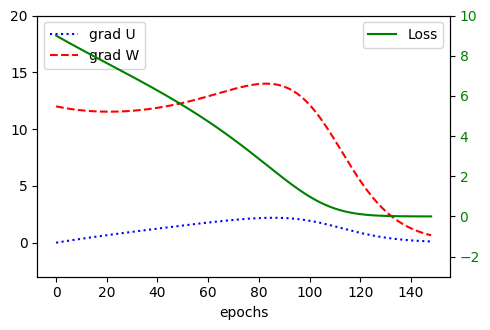

In [8]:
# Use these inputs for normal training
# The first dimension represents the mini-batch
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])

print("Sum of ones RNN from scratch")

losses, gradients_u, gradients_w = train(x, y, epochs=150)
plot_training(losses, gradients_u, gradients_w)

y[0]: 12
s[-1, -1]: 0.0
y[0]: 12
s[-1, -1]: 0.04802766392524801
y[0]: 12
s[-1, -1]: 0.0961253085610661
y[0]: 12
s[-1, -1]: 0.1446525918818886
y[0]: 12
s[-1, -1]: 0.1939797347485874
y[0]: 12
s[-1, -1]: 0.2445010922175978
y[0]: 12
s[-1, -1]: 0.2966503120004496
y[0]: 12
s[-1, -1]: 0.3509183461560175
y[0]: 12
s[-1, -1]: 0.4078759498179951
y[0]: 12
s[-1, -1]: 0.46820292868236923
y[0]: 12
s[-1, -1]: 0.5327274275807735
y[0]: 12
s[-1, -1]: 0.6024802455573349
y[0]: 12
s[-1, -1]: 0.678772000852277
y[0]: 12
s[-1, -1]: 0.763305883956946
y[0]: 12
s[-1, -1]: 0.8583476288125823
y[0]: 12
s[-1, -1]: 0.9669913470816927
y[0]: 12
s[-1, -1]: 1.093594818975408
y[0]: 12
s[-1, -1]: 1.2445362880383077
y[0]: 12
s[-1, -1]: 1.4296415100541646
y[0]: 12
s[-1, -1]: 1.6651957064549494
y[0]: 12
s[-1, -1]: 1.981395760480034
y[0]: 12
s[-1, -1]: 2.4455752424120756
y[0]: 12
s[-1, -1]: 3.267005132327328
y[0]: 12
s[-1, -1]: 5.841524050656412
y[0]: 12
s[-1, -1]: 429.54674360636875
y[0]: 12
s[-1, -1]: 1.9180719620274316e+130


C:\Users\od81hc\AppData\Local\Temp\ipykernel_54064\1820063810.py:7: RuntimeWarning: overflow encountered in multiply
  return x_t * U + s_t * W
C:\Users\od81hc\AppData\Local\Temp\ipykernel_54064\1406194472.py:12: RuntimeWarning: invalid value encountered in multiply
  gU += np.sum(gS * x[:, k - 1])
C:\Users\od81hc\AppData\Local\Temp\ipykernel_54064\1406194472.py:13: RuntimeWarning: invalid value encountered in multiply
  gW += np.sum(gS * s[:, k - 1])


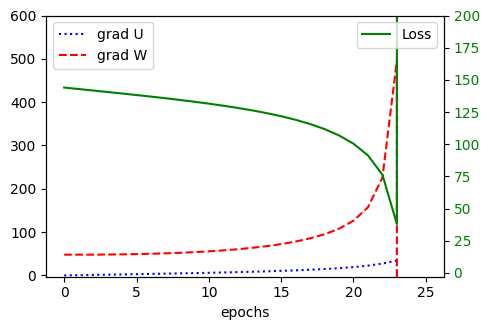

In [9]:
x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 
1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([12])
losses, gradients_u, gradients_w = train(x, y, epochs=150)
plot_training(losses, gradients_u, gradients_w, 600, 200)

After epoch 23, the gradient becomes so large that it goes out of the range of the float variable and becomes NaN (as illustrated by 
the jump in the plot). This problem is known as exploding gradients.


Exploding gradients can occur in any deep neural network, but they are especially pronounced in **recurrent neural networks (RNNs)** due to how these models process sequences over time.

**Depth through Time**

* In RNNs, the same set of weights is applied at each time step, effectively creating a deep network *unfolded through time*.
* For a long input sequence, this can mean **dozens or hundreds of layers** deep, depending on the sequence length.
* This depth amplifies the risk of gradients either **exploding** (growing exponentially) or **vanishing** (shrinking to zero).

**Gradient Calculation in RNNs**

$$
\frac{\partial J}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot \frac{\partial s_t}{\partial s_{t-1}} = \frac{\partial J}{\partial s_t} \cdot W
$$

* The gradient at a given time step depends on the product of many Jacobian matrices.
* If the eigenvalues of these matrices are **greater than 1**, the product can grow exponentially → **exploding gradients**.

**Parameter Sharing**

* RNNs use the **same parameters at each time step**, so any instability gets **repeated and accumulated**.
* Unlike a feedforward network where different layers can "learn" to counterbalance each other, RNNs don’t have that flexibility.

**Long-Term Dependencies**

* Trying to learn long-term dependencies increases the length of backpropagation, worsening the chance of gradient instability.

Thus,
* A regular feedforward neural network has a fixed, typically smaller depth.
* While very deep feedforward networks (e.g., 100+ layers) can also suffer from exploding gradients, the problem is **less common** and easier to mitigate with modern architectures (e.g., ResNets, normalization layers).


$$
    \frac{\partial s_t}{\partial s_{t-k}} = \prod_{j=1}^k \phi'(z_{t-j+1}) W  = W^k
$$
In a simple **linear RNN** with scalar weight $W$, the gradient between distant time steps behaves like $W^k$. This means that if $|W| > 1$, the gradient grows exponentially with time steps (exploding gradients), and if $|W| < 1$, it shrinks exponentially (vanishing gradients).

When $W$ is a matrix, this behavior generalizes: the gradient norm is influenced by the **spectral radius** $\rho(W)$, the largest absolute eigenvalue of $W$. If $\rho(W) > 1$, gradients tend to **explode**, and if $\rho(W) < 1$, they tend to **vanish**, though the exact behavior also depends on the activation function and its derivatives.

---

# Full Computation - Backpropagation Through Time <a id="section-iii"></a>

This notebook demonstrates the full computation process for Backpropagation Through Time (BPTT) in Recurrent Neural Networks (RNNs). We'll visualize the storage of intermediate states and gradient flow through time steps.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import seaborn as sns

## 1. Introduction to Full Computation in BPTT <a id="section-iii-1"></a>

Full computation in BPTT involves computing the entire gradient sum in the equation:

$$\frac{\partial h_t}{\partial w_h} = \frac{\partial f(x_t, h_{t-1}, w_h)}{\partial w_h} + \sum_{i=1}^{t-1}\left(\prod_{j=i+1}^{t}\frac{\partial f(x_j, h_{j-1}, w_h)}{\partial h_{j-1}}\right)\frac{\partial f(x_i, h_{i-1}, w_h)}{\partial w_h}$$

This approach:
- Computes gradients through *all* time steps without truncation
- Stores all intermediate states for backpropagation
- Captures long-term dependencies but can lead to:
  1. High memory usage
  2. Vanishing/exploding gradients
  3. Sensitivity to initial conditions (like the butterfly effect)

## 2. RNN with Full BPTT Implementation <a id="section-iii-2"></a>

In [17]:
# Define activation functions
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1 - np.tanh(x)**2

# Model setup
class RNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(output_size, hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
        
        # For storing intermediate states
        self.h_states = []
        self.h_raw = []
        self.y_preds = []
        
    def forward(self, x_sequence):
        # Initialize hidden state
        h = np.zeros((self.Whh.shape[0], 1))
        self.h_states = [h.copy()]
        self.h_raw = []
        self.y_preds = []
        
        # Forward pass through time
        for x in x_sequence:
            # Input to hidden
            h_raw = self.Wxh @ x + self.Whh @ h + self.bh
            h = tanh(h_raw)
            
            # Hidden to output
            y = self.Why @ h + self.by
            
            # Store all states
            self.h_raw.append(h_raw)
            self.h_states.append(h.copy())
            self.y_preds.append(y)
        
        return self.y_preds
    
    def backward(self, x_sequence, y_targets, learning_rate=0.01):
        # Initialize gradients
        dWxh = np.zeros_like(self.Wxh)
        dWhh = np.zeros_like(self.Whh)
        dWhy = np.zeros_like(self.Why)
        dbh = np.zeros_like(self.bh)
        dby = np.zeros_like(self.by)
        
        # Gradients of hidden state at t+1
        dh_next = np.zeros_like(self.h_states[0])
        
        # Log gradients for visualization
        gradient_magnitudes = []
        
        # Backpropagation through time
        T = len(x_sequence)
        for t in reversed(range(T)):
            # Gradient from output
            dy = self.y_preds[t] - y_targets[t]
            dWhy += dy @ self.h_states[t+1].T
            dby += dy
            
            # Gradient into hidden state: from output and from next time step
            dh = self.Why.T @ dy + dh_next
            
            # Gradient through tanh
            dh_raw = dtanh(self.h_raw[t]) * dh
            dbh += dh_raw
            
            # Gradient to weights
            dWxh += dh_raw @ x_sequence[t].T
            dWhh += dh_raw @ self.h_states[t].T
            
            # Gradient to previous hidden state
            dh_next = self.Whh.T @ dh_raw
            
            # Store gradient magnitude for visualization
            gradient_magnitudes.append(np.mean(np.abs(dh)))
            
        # Apply gradients
        self.Wxh -= learning_rate * dWxh
        self.Whh -= learning_rate * dWhh
        self.Why -= learning_rate * dWhy
        self.bh -= learning_rate * dbh
        self.by -= learning_rate * dby
        
        return gradient_magnitudes

## 3. Visualization of Full BPTT <a id="section-iii-3"></a>

In [18]:
def visualize_rnn_unfolding(sequence_length):
    """Visualize RNN unfolding through time with full computation"""
    plt.figure(figsize=(12, 6))
    
    # Parameters
    box_width = 1
    box_height = 1
    h_spacing = 2
    v_spacing = 1.5
    
    # Colors
    input_color = '#FFC107'  # amber
    hidden_color = '#2196F3'  # blue
    output_color = '#4CAF50'  # green
    arrow_color = '#9E9E9E'  # gray
    weight_color = '#E91E63'  # pink
    
    # Draw nodes and connections
    for t in range(sequence_length + 1):
        # Position for this time step
        x_pos = t * h_spacing
        
        if t < sequence_length:
            # Input node
            plt.gca().add_patch(Rectangle((x_pos, 0), box_width, box_height, 
                                         facecolor=input_color, alpha=0.7, edgecolor='black'))
            plt.text(x_pos + box_width/2, box_height/2, f'$x_{t}$', 
                     horizontalalignment='center', verticalalignment='center')
            
            # Output node
            plt.gca().add_patch(Rectangle((x_pos, 2*v_spacing), box_width, box_height, 
                                         facecolor=output_color, alpha=0.7, edgecolor='black'))
            plt.text(x_pos + box_width/2, 2*v_spacing + box_height/2, f'$y_{t}$', 
                     horizontalalignment='center', verticalalignment='center')
        
        # Hidden node
        plt.gca().add_patch(Rectangle((x_pos, v_spacing), box_width, box_height, 
                                     facecolor=hidden_color, alpha=0.7, edgecolor='black'))
        plt.text(x_pos + box_width/2, v_spacing + box_height/2, f'$h_{t}$', 
                 horizontalalignment='center', verticalalignment='center')
        
        if t < sequence_length:
            # Input to hidden connection
            arrow = FancyArrowPatch((x_pos + box_width/2, box_height), 
                                  (x_pos + box_width/2, v_spacing),
                                  arrowstyle='->', color=arrow_color, linewidth=1.5)
            plt.gca().add_patch(arrow)
            plt.text(x_pos + box_width/2 - 0.2, box_height + (v_spacing - box_height)/2, '$W_{xh}$',
                    color=weight_color)
            
            # Hidden to output connection
            arrow = FancyArrowPatch((x_pos + box_width/2, v_spacing + box_height), 
                                  (x_pos + box_width/2, 2*v_spacing),
                                  arrowstyle='->', color=arrow_color, linewidth=1.5)
            plt.gca().add_patch(arrow)
            plt.text(x_pos + box_width/2 - 0.2, v_spacing + box_height + (v_spacing - box_height)/2, '$W_{hy}$',
                    color=weight_color)
        
        # Recurrent connection (hidden to next hidden)
        if t < sequence_length:
            arrow = FancyArrowPatch((x_pos + box_width, v_spacing + box_height/2), 
                                  (x_pos + h_spacing, v_spacing + box_height/2),
                                  arrowstyle='->', color=arrow_color, linewidth=1.5, linestyle='--')
            plt.gca().add_patch(arrow)
            plt.text(x_pos + box_width + (h_spacing - box_width)/2, 
                    v_spacing + box_height/2 - 0.2, '$W_{hh}$', color=weight_color)
    
    # Draw backward pass
    for t in range(sequence_length-1, -1, -1):
        x_pos = t * h_spacing
        
        # Output to hidden backward
        arrow = FancyArrowPatch((x_pos + box_width/2, 2*v_spacing), 
                              (x_pos + box_width/2, v_spacing + box_height),
                              arrowstyle='<-', color='red', linewidth=1.0, linestyle=':')
        plt.gca().add_patch(arrow)
        
        # Hidden to previous hidden backward
        if t > 0:
            arrow = FancyArrowPatch((x_pos, v_spacing + box_height/2), 
                                  (x_pos - h_spacing + box_width, v_spacing + box_height/2),
                                  arrowstyle='<-', color='red', linewidth=1.0, linestyle=':')
            plt.gca().add_patch(arrow)
    
    # Label the backward arrows at the end
    plt.text(0.5 * h_spacing, 2*v_spacing - 0.2, r'$\frac{\partial L}{\partial y_t}$', color='red')
    plt.text(1.5 * h_spacing, v_spacing + 0.3, r'$\frac{\partial L}{\partial h_t}$', color='red')
    
    # Add title and adjust plot
    plt.title('Full Computation in BPTT: Unfolding RNN Through Time')
    plt.xlim(-0.5, sequence_length * h_spacing + 1)
    plt.ylim(-0.5, 3 * v_spacing)
    plt.axis('off')
    
    # Add a legend for forward and backward passes
    arrow_f = FancyArrowPatch((0, 0), (0.5, 0), arrowstyle='->', color=arrow_color, linewidth=1.5)
    arrow_b = FancyArrowPatch((0, 0), (0.5, 0), arrowstyle='<-', color='red', linewidth=1.0, linestyle=':')
    plt.legend([arrow_f, arrow_b], ['Forward Pass', 'Backward Pass'], 
              loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    
    plt.tight_layout()
    plt.show()

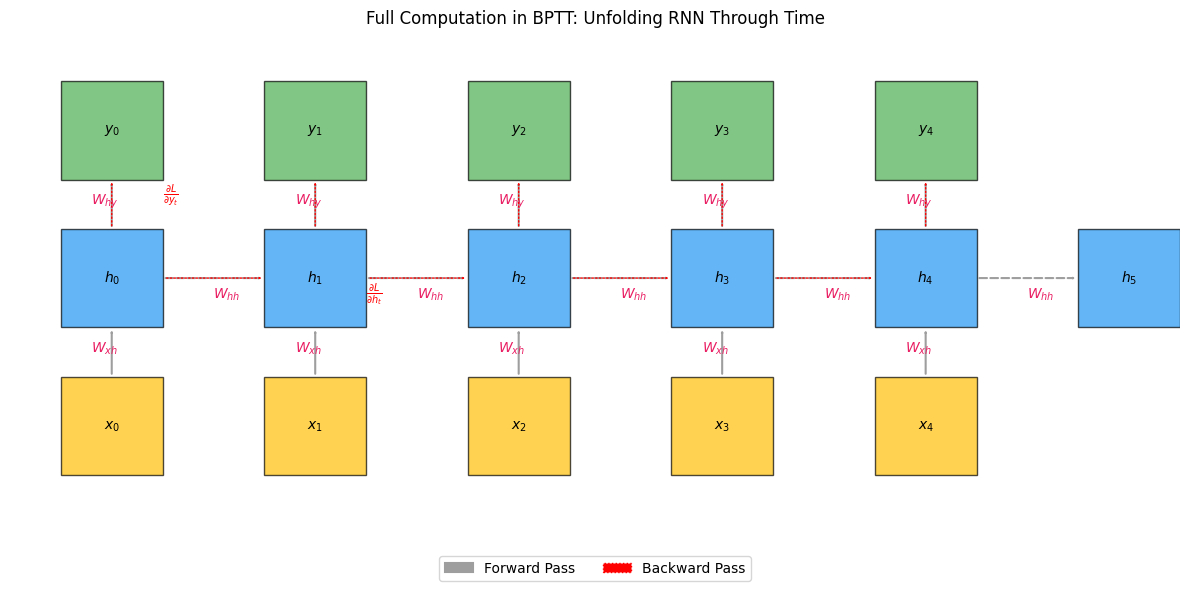

In [19]:
# Visualize full BPTT unfolding for a sequence of length 5
visualize_rnn_unfolding(5)

## 4. Demonstration of Gradient Behavior in Full BPTT <a id="section-iii-4"></a>

In [20]:
def run_gradient_experiment(sequence_lengths=[5, 10, 20, 50]):
    """Run experiments showing gradient behavior for different sequence lengths"""
    # Parameters
    input_size = 1
    hidden_size = 4
    output_size = 1
    
    # Results storage
    all_gradients = {}
    
    for seq_len in sequence_lengths:
        # Create a simple sine wave sequence
        x = np.linspace(0, 4*np.pi, seq_len)
        x_sequence = [np.array([[np.sin(val)]]) for val in x]
        y_targets = [np.array([[np.sin(val + 0.1)]]) for val in x]  # Shifted sine
        
        # Initialize RNN
        rnn = RNN(input_size, hidden_size, output_size)
        
        # Forward and backward passes
        rnn.forward(x_sequence)
        gradient_magnitudes = rnn.backward(x_sequence, y_targets)
        
        # Store results
        all_gradients[seq_len] = gradient_magnitudes
    
    # Visualization of gradient magnitudes
    plt.figure(figsize=(10, 6))
    
    for seq_len, grads in all_gradients.items():
        # Reverse to show gradients from start to end
        plt.plot(list(range(seq_len)), grads[::-1], label=f'Sequence Length: {seq_len}')
    
    plt.xlabel('Time Step')
    plt.ylabel('Average Gradient Magnitude')
    plt.title('Gradient Magnitudes in Full BPTT by Sequence Length')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Log scale to show vanishing gradients
    plt.tight_layout()
    plt.show()
    
    return all_gradients

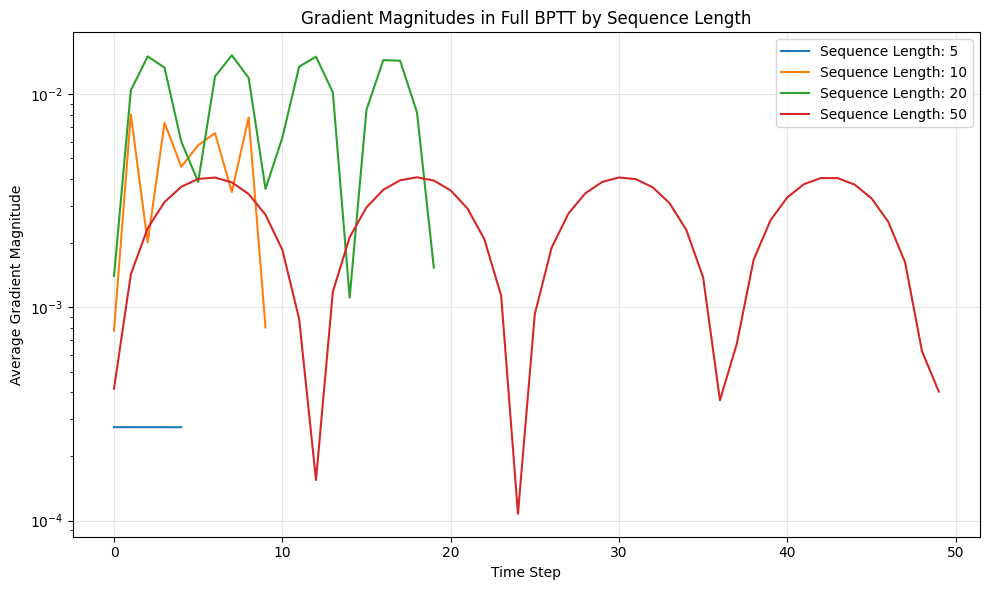

In [21]:
# Run gradient experiment
gradient_results = run_gradient_experiment()

## 5. The Challenges of Full Computation <a id="section-iii-5"></a>

From our visualization and experiments, we can observe several key properties of full BPTT computation:

1. **Memory Requirements**: Full BPTT requires storing all intermediate states for potentially long sequences.
   
2. **Vanishing Gradients**: As shown in our gradient plots, gradients from later time steps have a diminishing impact on earlier time steps. This is due to repeated multiplication with the hidden-to-hidden weight matrix.
   
3. **Computational Complexity**: The computational workload grows with sequence length, which can make training prohibitively expensive for very long sequences.

4. **Butterfly Effect**: Small changes in initial parameters can lead to dramatically different outcomes due to the recurrent nature of the computation.

5. **Mathematical Formulation**: The full gradient computation actually incorporates many sub-paths through the computational graph. From time step $t$ to time step $1$, we have to account for all possible paths.

These challenges often lead practitioners to employ alternatives like truncated BPTT or architectural solutions like LSTM/GRU cells.

## 6. Memory Storage Visualization <a id="section-iii-6"></a>

One key aspect of full computation is the need to store all intermediate states. Let's visualize this:

In [22]:
def visualize_memory_storage(sequence_length):
    """Visualize memory storage requirements for full BPTT"""
    plt.figure(figsize=(10, 6))
    
    # Generate data
    hidden_sizes = [4, 16, 64, 256]
    memory_usage = [[h_size * seq_len for seq_len in range(1, sequence_length+1)] for h_size in hidden_sizes]
    
    # Plot memory usage
    for i, h_size in enumerate(hidden_sizes):
        plt.plot(range(1, sequence_length+1), memory_usage[i], label=f'Hidden Size: {h_size}')
    
    plt.xlabel('Sequence Length')
    plt.ylabel('Relative Memory Units')
    plt.title('Memory Storage Requirements for Full BPTT')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

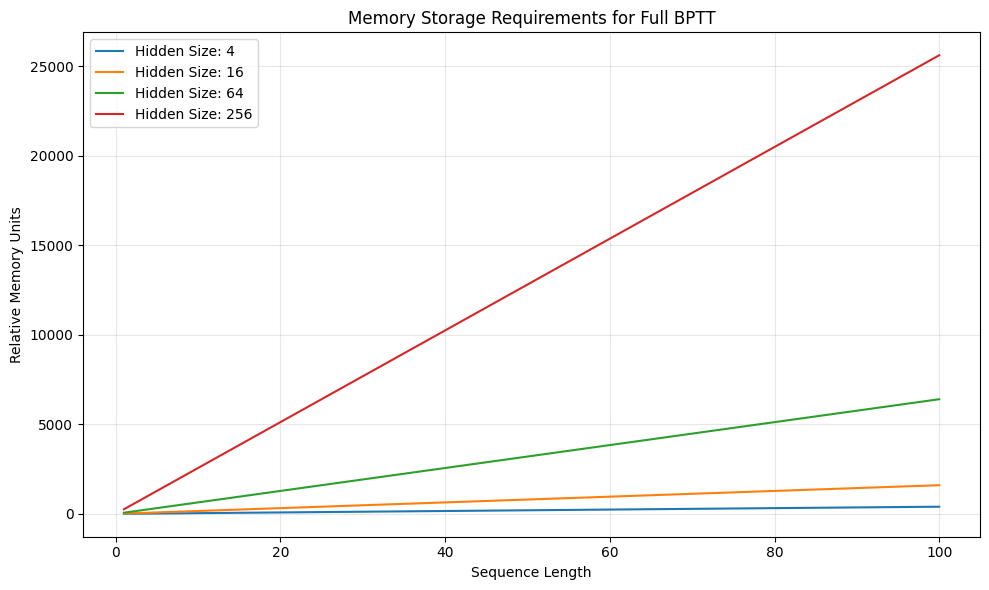

In [23]:
# Visualize memory storage for sequence lengths up to 100
visualize_memory_storage(100)

## 7. Conclusion <a id="section-iii-7"></a>

Full computation in BPTT provides the most accurate gradient estimates but comes with significant challenges:

- It requires storing all intermediate states, which grows linearly with sequence length
- It suffers from vanishing and exploding gradients for long sequences
- It is computationally expensive for long sequences

These challenges often lead to the use of truncated BPTT in practice, or specialized architectures like LSTMs and GRUs that are designed to mitigate some of these issues.

While full computation is theoretically complete, the practical considerations often outweigh the benefits of having exact gradients, especially for tasks involving very long sequences.

# Giải pháp và Các phương pháp huấn luyện khác <a id="section-iv"></a>

## Giải pháp xử lý vanishing/exploding gradients bằng Truncated BPTT <a id="section-iv-1"></a>
Truncated Backpropagation Through Time (TBPTT) là một phương pháp tối ưu hóa quá trình huấn luyện các mạng nơ-ron hồi tiếp (RNN) trên các chuỗi dữ liệu dài, bằng cách chia chuỗi đầu vào thành các đoạn con (subsequences) có độ dài cố định.


### Nguyên lý hoạt động <a id="section-iv-1-1"></a>
- Forward pass:
    - Mỗi đoạn con được xử lý tuần tự. Trạng thái ẩn (hidden state) từ đoạn con trước được truyền sang làm giá trị khởi tạo cho đoạn con tiếp theo.
    - Ví dụ: Nếu chuỗi gốc dài 100 bước thời gian được chia thành 4 đoạn (mỗi đoạn 25 bước), hidden state ở bước 25 sẽ dùng làm đầu vào cho đoạn 26–50.
- Backward pass:
    - Gradient chỉ được tính toán trong phạm vi từng đoạn con và bị "cắt bỏ" (truncated) khi chuyển sang đoạn tiếp theo.
    - Khác với BPTT tiêu chuẩn (gradient lan truyền qua toàn bộ chuỗi), TBPTT ngăn gradient từ đoạn sau ảnh hưởng đến đoạn trước nếu vượt quá độ dài đoạn con.

### Ưu điểm của phương pháp trên <a id="section-iv-1-2"></a>
1. Giảm nguy cơ gradient vanishing/exploding:
    - Việc giới hạn số bước $\tau$ làm giảm số lượng tích các ma trận Jacobian $\prod_{j=i+1}^t \frac{\partial f}{\partial h_{j-1}}$, từ đó:
        - Tránh tích luỹ các giá trị Jacobian nhỏ (< 1) gây gradient vanishing 

2. Tiết kiệm bộ nhớ
    - Chỉ lưu trữ gradient cho $\tau$ bước gần nhất, giảm đáng kể yêu cầu bộ nhớ
3. Tốc độ
    - Giảm chi phí tính toán cho chuỗi dài khi số phép tính giảm từ O($T$) xuống còn O($\tau$)

### Ứng dụng thực tế <a id="section-iv-1-3"></a>
- Mô hình ngôn ngữ (Language Models): xử lý văn bản dài
- Dự báo chuỗi thời gian: Dự báo giá cổ phiếu, thời tiết
- Xử lý âm thanh: Nhận dạng giọng nói

### Hạn chế <a id="section-iv-1-4"></a>
- Việc giới hạn số bước khiến cho các phụ thuộc từ đầu chuỗi không được xét đến, dẫn đến giảm hiệu suất trong các tác vụ yêu cầu bộ nhớ dài
- Gradient tính toán không chính xác như Full Computation, nhưng vẫn đủ tốt để huấn luyện hiệu quả

### Hiện thực <a id="section-iv-1-5"></a>

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import numpy as np
import matplotlib.pyplot as plt

Đầu tiên, ta xây dựng mô hình RNN đơn giản từ đầu qua lớp RNNScratch, có nhiệm vụ thực hiện quá trình tính toán cho chuỗi đầu vào qua các bước thời gian.

In [ ]:
class RNNScratch(d2l.Module):  
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        """
        Args:
            num_inputs (int): Kích thước input features
            num_hiddens (int): Kích thước hidden state
            sigma (float): Độ lệch chuẩn cho khởi tạo trọng số
        """
        super().__init__()
        self.save_hyperparameters()
        self.W_xh = nn.Parameter(
            torch.randn(num_inputs, num_hiddens) * sigma)
        self.W_hh = nn.Parameter(
            torch.randn(num_hiddens, num_hiddens) * sigma)
        self.b_h = nn.Parameter(torch.zeros(num_hiddens))

    def forward(self, inputs, state=None):
        """
        Args:
            inputs (Tensor): Input sequence tensor 
                shape: (num_steps, batch_size, num_inputs)
            state (tuple, optional): Hidden state tuple. Defaults to None.
        
        Returns:
            outputs (list): Danh sách các hidden states qua tất cả time steps
            state (tuple): Final hidden state
        """
        if state is None:
            # Khởi tạo hidden state đầu tiên
            state = (torch.zeros((inputs.shape[1], self.num_hiddens),
                            device=inputs.device),)
        else:
            state = state
        outputs = []
        h, = state
        for X in inputs: # Duyệt qua từng time step
            h = torch.tanh(torch.matmul(X, self.W_xh) +
                            torch.matmul(h, self.W_hh) + self.b_h)
            outputs.append(h)
        return outputs, (h,) 

Tiếp theo, ta định nghĩa lớp RNNLMScratch để xây dựng mô hình ngôn ngữ (Language Model) sử dụng RNN để dự đoán các từ trong chuỗi văn bản

In [ ]:
class RNNLMScratch(d2l.Classifier):  #@save
    def __init__(self, rnn, vocab_size, lr=0.01, tau=32):
        """
        Args:
            rnn (RNNScratch): Instance của RNN
            vocab_size (int): Kích thước từ điển
            lr (float): Learning rate
            tau (int): Kích thước chunk cho Truncated BPTT
        """
        super().__init__()
        self.save_hyperparameters()
        self.init_params()

    def init_params(self):
        """Khởi tạo parameters cho output layer"""
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch):
        """Xử lý một batch training và tính loss
        Args:
            batch (tuple): Chứa inputs và targets 
                (X, Y) với shape (batch_size, num_steps)
        """
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch):
        """Xử lý một batch validation và tính loss"""
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)

    def one_hot(self, X):
        """Chuyển đổi indices sang one-hot vectors
        Args:
            X (Tensor): Input tensor indices shape (num_steps, batch_size)
        Returns:
            Tensor: One-hot tensor shape (num_steps, batch_size, vocab_size)
        """
        return F.one_hot(X.T, self.vocab_size).type(torch.float32)

    def output_layer(self, rnn_outputs):
        """Biến đổi hidden states sang logits
        Args:
            rnn_outputs (list): Danh sách các hidden states từ RNN
        Returns:
            Tensor: Logits shape (batch_size, num_steps, vocab_size)
        """
        outputs = [torch.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
        return torch.stack(outputs, 1)

    def forward(self, X, state=None):
        """
        Forward pass với Truncated BPTT
        Args:
            X (Tensor): Input tensor indices shape (batch_size, num_steps)
            state (tuple, optional): Initial hidden state. Defaults to None.
        
        Returns:
            Tensor: Logits predictions shape (batch_size, num_steps, vocab_size)
        """
        embs = self.one_hot(X)
        tau = self.tau
        all_outputs = []
        hidden = state
        num_steps = embs.shape[0]

        # Xử lý input theo từng chunk kích thước tau
        for i in range(0, num_steps, tau):
            chunk = embs[i:i+tau]
            if hidden is not None:
                # Ngắt gradient giữa các chunk cho Truncated BPTT
                hidden = tuple(h.detach() for h in hidden)
            # Forward qua RNN cho chunk hiện tại
            rnn_outputs, hidden = self.rnn(chunk, hidden)
            all_outputs.extend(rnn_outputs)

        # Áp dụng output layer cho tất cả outputs
        return self.output_layer(all_outputs)

    def predict(self, prefix, num_preds, vocab, device=None):
        """
        Dự đoán chuỗi ký tự
        Args:
            prefix (str): Chuỗi khởi đầu
            num_preds (int): Số ký tự cần dự đoán
            vocab (Vocab): Đối tượng từ điển
            device (torch.device, optional): Thiết bị tính toán
            
        Returns:
            str: Chuỗi kết quả đã được dự đoán
        """
        state, outputs = None, [vocab[prefix[0]]]
        for i in range(len(prefix) + num_preds - 1):
            X = torch.tensor([[outputs[-1]]], device=device)
            embs = self.one_hot(X)
            rnn_outputs, state = self.rnn(embs, state)
            if i < len(prefix) - 1:  
                outputs.append(vocab[prefix[i + 1]])
            else:  
                Y = self.output_layer(rnn_outputs)
                outputs.append(int(Y.argmax(axis=2).reshape(1)))
        return ''.join([vocab.idx_to_token[i] for i in outputs])

Sau khi định nghĩa các lớp, ta tiến hành quá trình huấn luyện một mô hình RNN để dự đoán chuỗi văn bản như sau:
- Batch size được chọn là 128 để tối ưu hiệu suất tính toán trên GPU đồng thời đảm bảo ước lượng gradient ổn định, phù hợp với kích thước dataset Time Machine.
- Độ dài chuỗi (num_inputs) được chọn là 32 để mô hình nắm bắt các mid-term dependency trong văn bản. Giá trị này phù hợp với tham số tau=5 nhằm đánh giá tác động của TBPTT lên gradient flow.
- kích thước trạng thái ẩn (num_hiddens) được chọn là 128 dựa trên thực nghiệm, đảm bảo mô hình đủ sức biểu diễn các pattern phức tạp trong khi tránh overfitting.
- Learning Rate (lr) được chọn là 0.1 để tăng tốc hội tụ, kết hợp với gradient clipping (ngưỡng 1) nhằm ổn định quá trình lan truyền ngược.
- Chunk size (tau) được chọn là 5 để hạn chế gradient vanishing/exploding, đồng thời đánh giá sự đánh đổi giữa hiệu suất tính toán và khả năng học phụ thuộc dài hạn của TBPTT.
- Mô hình được huấn luyện trong 100 epoch để đảm bảo hội tụ tối ưu mà không rơi vào trạng thái overfitting.
- Gradient clipping được áp dụng với ngưỡng 1 để ổn định quá trình cập nhật trọng số, đặc biệt khi kết hợp với learning rate cao.

In [ ]:
data = d2l.TimeMachine(batch_size=128, num_steps=32)
rnn = RNNScratch(num_inputs=len(data.vocab), num_hiddens=128)
model = RNNLMScratch(rnn, vocab_size=len(data.vocab), lr=0.1, tau=5)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

Đồ thị thể hiện sự thay đổi của Perplexity trong quá trình huấn luyện:
- Đường màu xanh (train_ppl) thể hiện mức độ phức tạp của mô hình khi huấn luyện.
- Đường màu đỏ (val_ppl) thể hiện mức độ phức tạp của mô hình trên dữ liệu kiểm tra. 

1. Giai đoạn đầu (Epoch 0 - 20):
- Cả train_ppl và val_ppl giảm mạnh từ 25 xuống 10, cho thấy mô hình học nhanh các pattern cơ bản trong dữ liệu
- Khoảng cách giữa 2 đường rất nhỏ $\rightarrow$ chưa có dấu hiệu overfitting
2. Giai đoạn giữa (Epoch 20 - 60):
- Tốc độ giảm chậm lại: train_ppl giảm từ 10 xuống 5 trong khi val_ppl giảm từ 10 xuống 7.
- Khoảng cách giữa train và val tăng nhẹ $\rightarrow$ Mô hình bắt đầu học chi tiết hơn trên tập huấn luyện, nhưng vẫn duy trì khả năng khái quát hóa.
3. Giai đoạn cuối (Epoch 60-100):
- train_ppl tiếp tục giảm chậm, đạt xấp xỉ 3-4 ở epoch 100
- val_ppl ổn định quanh 7-8, không có dấu hiệu tăng đột ngột $\rightarrow$ không xảy ra overfitting nghiêm trọng

Khi thực hiện dự đoán với câu khởi đầu "it has" và yêu cầu sinh thêm 20 ký tự, mô hình trả về kết quả:

In [ ]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

Có thể thấy tuy chuỗi được sinh ra chưa được mạch lạc do các vấn đề như kiến trúc còn đơn giản, sự hạn chế của khả năng học dependency ở xa, cấu trúc văn bản chưa đủ đa dạng để mô hình học ngữ cảnh phức tạp. Nhưng nhìn chung, ta vẫn thấy được một số điều tích cực như chuỗi dự đoán phù hợp với chủ đề của dataset và mô hình đã học được một số pattern đơn giản (ví dụ như cấu trúc "it has a ...").

## Giải pháp xử lý vanishing/exploding gradients bằng Truncated BPTT: **Randomized Truncation** <a id="section-iv-2"></a>

### Nguyên lý hoạt động <a id="section-iv-2-1"></a>

**Randomized Truncation** là một kỹ thuật giúp giảm chi phí tính toán khi huấn luyện mạng RNN (Recurrent Neural Network). Cụ thể, thay vì tính chuỗi gradient đầy đủ qua tất cả các bước thời gian (rất tốn kém), ta sẽ ngẫu nhiên dừng lại ở một số bước nhưng vẫn đảm bảo rằng kỳ vọng của gradient không thay đổi (tức là trung bình kết quả vẫn đúng).

Đạo hàm chuẩn (gradient chuẩn) cần tính trong RNN là:

$$
\frac{\partial h_t}{\partial w_h}
$$

Thay vì tính toàn bộ biểu thức này, ta thay thế bằng một giá trị xấp xỉ, ký hiệu là $z_{t}$, với công thức:

$$
z_t = \frac{\partial f(x_{t}, h_{t-1}, w_h)}{\partial w_h} + \xi_t \frac{\partial f(x_{t}, h_{t-1}, w_h)}{\partial h_{t-1}} \cdot \frac{\partial h_{t-1}}{\partial w_h}
$$


Trong đó:


*   $f(x_{t},h_{t-1},w_h)$ là hàm cập nhật trạng thái trong RNN.
*   $\xi_t$ là một biến ngẫu nhiên nhận giá trị:
  *   0 với xác suất $P(\xi_t = 0) = 1-\pi_t$
  *   $\pi_t^{-1}$ với xác suất $P(\xi_t = \pi_t^{-1}) = \pi_t$

Do đó, kỳ vọng của $\xi_t$ là:
\begin{equation}
  E[z_t] = 0 ⋅(1-\pi_t)+ \frac{1}{\pi_t} ⋅\pi_t = 1
\end{equation}

→ Dẫn đến kỳ vọng của $z_{t}$ vẫn là gradient đầy đủ:

\begin{equation}
  E[z_t] = \frac{\partial h_t}{\partial w_h}
\end{equation}

 Bất cứ khi nào $\xi_t = 0$ tính toán tái phát chấm dứt tại thời điểm đó bước $t$. Điều này dẫn đến một tổng có trọng số của các chuỗi có độ dài khác nhau, trong đó các chuỗi dài tuy hiếm gặp nhưng lại được gán trọng số lớn một cách phù hợp.

### Ưu điểm của Randomized Truncation <a id="section-iv-2-2"></a>


1.   Giảm chi phí tính toán
  *   Thay vì phải lan truyền ngược qua toàn bộ chuỗi thời gian (có thể dài hàng trăm bước), thuật toán này chỉ lan truyền ngược một phần chuỗi ngẫu nhiên.
  *   Giảm đáng kể thời gian huấn luyện và mức tiêu thụ bộ nhớ (RAM/GPU).
2.   Tránh vanishing/exploding gradient
  *   Trong mạng RNN truyền thống, việc lan truyền gradient qua nhiều bước khiến giá trị đạo hàm rất nhỏ (vanishing gradient) hoặc rất lớn (exploding gradient).
  *   Randomized truncation giới hạn độ sâu lan truyền, giúp gradient ổn định hơn.
3.   Giữ nguyên độ chính xác theo kỳ vọng
  *   Mặc dù cắt chuỗi ngẫu nhiên, thuật toán vẫn đảm bảo kỳ vọng của gradient đúng:
\begin{equation}
  E[z_t] = \frac{\partial h_t}{\partial w_h}
\end{equation}
4.   Tăng khả năng tổng quát
  *  Việc ngẫu nhiên hóa độ dài chuỗi huấn luyện tương đương với một dạng regularization (giống như dropout), có thể giúp mô hình tổng quát tốt hơn trên dữ liệu mới.
5.   Dễ triển khai, không cần thay đổi kiến trúc mạng
  *  Kỹ thuật này chỉ thay đổi cách lan truyền ngược gradient, không cần sửa đổi mô hình hay thêm thành phần phức tạp nào.
  *  Có thể tích hợp dễ dàng vào các pipeline huấn luyện RNN hiện có (như PyTorch, TensorFlow).
5.   Hiệu quả với chuỗi rất dài
  *  Với dữ liệu thời gian hoặc chuỗi văn bản dài (ví dụ: hàng nghìn bước), đây là một giải pháp thực tế thay vì huấn luyện full BPTT (Backpropagation Through Time) quá nặng.

### Hạn chế của Randomized Truncation <a id="section-iv-2-3"></a>

*   Do quá trình backpropagation có thể bị cắt sớm ngẫu nhiên, các mối quan hệ phụ thuộc dài hạn trong chuỗi có thể bị bỏ sót.
*   Do tính ngẫu nhiên trong việc cắt gradient, kết quả huấn luyện có thể dao động đáng kể giữa các lần huấn luyện khác nhau nếu không cố định seed.
*   Nếu chọn $\pi_t$ quá nhỏ → mô hình cắt sớm quá thường xuyên → học chưa đủ.
*   Nếu $\pi_t$ quá lớn → gần giống như backprop đầy đủ → mất ưu điểm giảm chi phí.
*   Việc chọn $\pi_t$ phù hợp phụ thuộc vào bài toán cụ thể, và thường cần thử nghiệm (hyperparameter tuning).
* Gradient nhiễu, hội tụ chậm
* Chưa được hỗ trợ sẵn trong framework

### Ví dụ bài toán: Dự đoán giá trị trong chuỗi thời gian <a id="section-iv-2-4"></a>


Ta xét bài toán dự đoán giá trị tiếp theo trong một chuỗi sin bị nhiễu:
\begin{equation}
  y_t = sin(t) + noise
\end{equation}

Sử dụng một RNN đơn giản (1 layer), ta huấn luyện để dự đoán $y_{t+1}$ dựa trên lịch sử $y_0,⋯,y_t$

### Kế hoạch triển khai <a id="section-iv-2-5"></a>

1.   Tạo chuỗi dữ liệu sin bị nhiễu.
2.   Xây dựng RNN đơn giản.
3.   Viết lại vòng lặp training để chèn Randomized Truncation.
4.   So sánh:

    *   Huấn luyện không truncate (chuẩn).
    *   Huấn luyện có Randomized Truncation.

5.   Vẽ đồ thị Loss vs Epoch.



Bắt đầu viết Code Python

In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import psutil  # để đo bộ nhớ CPU

# Bước 1: Xác định device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Đang sử dụng: {device}")

Đang sử dụng: cuda


Tạo dữ liệu chuỗi sin bị nhiễu

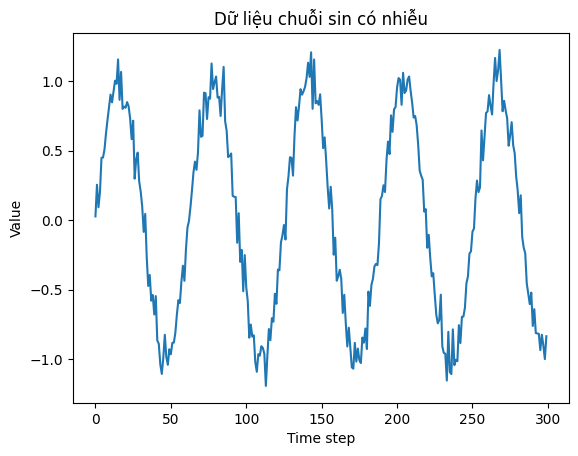

In [11]:
# Tạo dữ liệu sin với noise
def generate_data(seq_length=1000):
    t = np.linspace(0, 100, seq_length)
    y = np.sin(t) + 0.1 * np.random.randn(seq_length)  # sin + noise
    return y

# Dữ liệu
data = generate_data()
plt.plot(data[:300])
plt.title("Dữ liệu chuỗi sin có nhiễu")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.show()


Xây dựng mô hình RNN đơn giản

In [12]:
# Mô hình RNN đơn giản
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=20):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, h=None):
        out, h = self.rnn(x, h)
        out = self.fc(out)
        return out, h

Hàm training với tùy chọn Randomized Truncation

In [13]:
# Hàm training có đo thời gian và bộ nhớ
def train(model, data, use_randomized_truncation=False, pi=0.9, num_epochs=30, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    losses = []

    model.train()

    # Đo thời gian bắt đầu
    start_time = time.time()

    # Đo bộ nhớ ban đầu
    process = psutil.Process()
    mem_before = process.memory_info().rss / 1024 / 1024  # MB

    # Đo bộ nhớ GPU ban đầu
    if torch.cuda.is_available():
        gpu_mem_before = torch.cuda.memory_allocated() / 1024 ** 2  # MB
        gpu_reserved_before = torch.cuda.memory_reserved() / 1024 ** 2  # MB
    else:
        gpu_mem_before = 0.0
        gpu_reserved_before = 0.0

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        h = None
        loss_epoch = 0
        count = 0

        for t in range(len(data)-1):
            x = torch.tensor([[data[t]]], dtype=torch.float32).unsqueeze(0).to(device)  # (batch, seq_len, input_size)
            y_true = torch.tensor([[data[t+1]]], dtype=torch.float32).unsqueeze(0).to(device)

            y_pred, h = model(x, h)

            loss = criterion(y_pred, y_true)
            loss_epoch += loss

            # Randomized truncation
            if use_randomized_truncation:
                if np.random.rand() > pi:
                    h = h.detach()

            count += 1

        loss_epoch = loss_epoch / count
        loss_epoch.backward()
        optimizer.step()
        losses.append(loss_epoch.item())

        if (epoch+1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss_epoch.item():.6f}")

    # Đo thời gian kết thúc
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Đo bộ nhớ GPU sau huấn luyện
    if torch.cuda.is_available():
        gpu_mem_after = torch.cuda.memory_allocated() / 1024 ** 2  # MB
        gpu_reserved_after = torch.cuda.memory_reserved() / 1024 ** 2  # MB
    else:
        gpu_mem_after = 0.0
        gpu_reserved_after = 0.0

    # Tính bộ nhớ GPU sử dụng
    gpu_mem_used = gpu_mem_after - gpu_mem_before
    gpu_reserved_used = gpu_reserved_after - gpu_reserved_before

    # Đo bộ nhớ sau huấn luyện
    mem_after = process.memory_info().rss / 1024 / 1024  # MB
    mem_used = mem_after - mem_before

    return losses, elapsed_time, mem_used, gpu_mem_used, gpu_reserved_used


Giải thích:


*   Với use_randomized_truncation=True, tại mỗi bước $t$, xác suất $1-\pi_t$ sẽ cắt đứt backpropagation (bằng .detach()).
*   Nếu không, để gradient lan truyền bình thường.
*   Cuối mỗi epoch, tính Loss trung bình và lưu lại để vẽ biểu đồ.



Huấn luyện mô hình và so sánh

Training WITHOUT Randomized Truncation...
Epoch 5/30, Loss: 0.085890
Epoch 10/30, Loss: 0.023705
Epoch 15/30, Loss: 0.030206
Epoch 20/30, Loss: 0.028792
Epoch 25/30, Loss: 0.021319
Epoch 30/30, Loss: 0.019487

Training WITH Randomized Truncation (pi=0.9)...
Epoch 5/30, Loss: 0.190057
Epoch 10/30, Loss: 0.044903
Epoch 15/30, Loss: 0.031553
Epoch 20/30, Loss: 0.028873
Epoch 25/30, Loss: 0.028075
Epoch 30/30, Loss: 0.024501


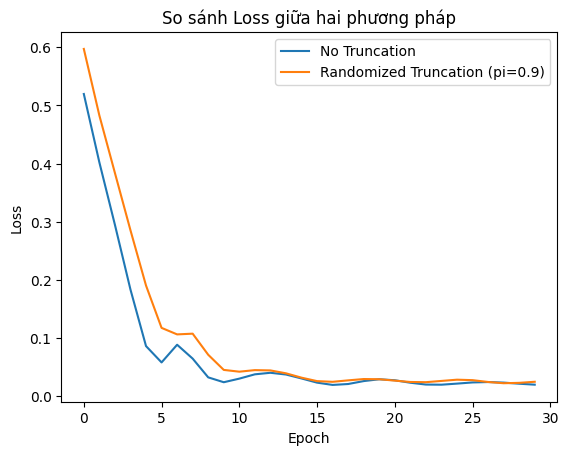


==== Tổng Kết ====
[No Truncation]    Thời gian: 24.26 giây, Bộ nhớ tăng (CPU): 229.52 MB
[Random Truncation] Thời gian: 23.98 giây, Bộ nhớ tăng (CPU): 0.62 MB

==== Thống kê GPU (kèm thời gian huấn luyện) ====
[No Truncation]    Thời gian: 24.26 giây | Bộ nhớ GPU sử dụng: 16.27 MB | Bộ nhớ GPU reserved: 42.00 MB
[Random Truncation] Thời gian: 23.98 giây | Bộ nhớ GPU sử dụng: 0.02 MB | Bộ nhớ GPU reserved: 0.00 MB


In [14]:
# --- Chạy và so sánh ---
data = generate_data()

# Huấn luyện model không truncate
print("Training WITHOUT Randomized Truncation...")
model_standard = SimpleRNN().to(device)
losses_standard, time_standard, memory_standard, gpu_mem_standard, gpu_reserved_standard = train(model_standard, data, use_randomized_truncation=False)

# Huấn luyện model có truncate
print("\nTraining WITH Randomized Truncation (pi=0.9)...")
model_truncated = SimpleRNN().to(device)
losses_truncated, time_truncated, memory_truncated, gpu_mem_truncated, gpu_reserved_truncated = train(model_truncated, data, use_randomized_truncation=True, pi=0.9)

# Vẽ biểu đồ Loss
plt.plot(losses_standard, label="No Truncation")
plt.plot(losses_truncated, label="Randomized Truncation (pi=0.9)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("So sánh Loss giữa hai phương pháp")
plt.show()

# In kết quả tổng hợp
print("\n==== Tổng Kết ====")
print(f"[No Truncation]    Thời gian: {time_standard:.2f} giây, Bộ nhớ tăng (CPU): {memory_standard:.2f} MB")
print(f"[Random Truncation] Thời gian: {time_truncated:.2f} giây, Bộ nhớ tăng (CPU): {memory_truncated:.2f} MB")

# In bộ nhớ GPU tổng thể kèm theo thời gian huấn luyện
if torch.cuda.is_available():
    print("\n==== Thống kê GPU (kèm thời gian huấn luyện) ====")
    print(f"[No Truncation]    Thời gian: {time_standard:.2f} giây | Bộ nhớ GPU sử dụng: {gpu_mem_standard:.2f} MB | Bộ nhớ GPU reserved: {gpu_reserved_standard:.2f} MB")
    print(f"[Random Truncation] Thời gian: {time_truncated:.2f} giây | Bộ nhớ GPU sử dụng: {gpu_mem_truncated:.2f} MB | Bộ nhớ GPU reserved: {gpu_reserved_truncated:.2f} MB")

Giải thích kết quả

*   **Loss không truncate:** thường thấp hơn một chút, do sử dụng toàn bộ thông tin quá khứ.
*   **Loss Randomized Truncation:** có thể dao động hơn, nhưng lại giúp:
  *   Tiết kiệm bộ nhớ.
  *   Training nhanh hơn.
  *   Tránh vanishing gradient trong chuỗi quá dài.





In [15]:
# Dự đoán giá trị tiếp theo
model_truncated.eval()  # Chuyển mô hình sang chế độ đánh giá
with torch.no_grad():  # Tắt gradient khi dự đoán
    x_input = torch.tensor([[data[-1]]], dtype=torch.float32).unsqueeze(0).to(device)  # Dữ liệu đầu vào
    y_pred, _ = model_truncated(x_input, h=None)  # Dự đoán giá trị tiếp theo
    print(f"Dự đoán giá trị tiếp theo: {y_pred.item():.6f}")

Dự đoán giá trị tiếp theo: -0.290121


# Giải bài tập <s id="section-v">

## Đề bài

1. Giả sử chúng ta có một ma trận đối xứng $ M \in \mathbb{R}^{n \times n} $ với các giá trị riêng $ \lambda_i $ và các vector riêng tương ứng $ \mathbf{v}_i $ ($ i = 1, \ldots, n $). Không mất tính tổng quát, giả sử chúng được sắp xếp theo thứ tự $ |\lambda_i| \geq |\lambda_{i+1}| $.  

    a. Chứng minh rằng $ M^k $ có các giá trị riêng $ \lambda_i^k $.  

    b. Chứng minh rằng với một vector ngẫu nhiên $ \mathbf{x} \in \mathbb{R}^n $, xác suất cao là $ M^k \mathbf{x} $ sẽ rất gần với vector riêng $ \mathbf{v}_1 $ của $ M $. Hãy làm rõ phát biểu này.  

    c. Kết quả trên có ý nghĩa gì đối với gradient trong các mạng RNN?

2. Ngoài việc cắt gradient (gradient clipping), còn phương pháp nào khác để xử lý hiện tượng bùng nổ gradient (gradient explosion) trong mạng nơ-ron hồi tiếp (RNN) không?

## Bài làm

### 1a. Chứng minh rằng $M^k$ có các giá trị riêng là $\lambda_i^k$. <a id="section-v-1-1"></a>

**Chứng minh:**

Giả sử $M$ là một ma trận đối xứng có các giá trị riêng $\lambda_i$ và các vectơ riêng tương ứng $\mathbf{v}_i$, ta có:

$$
M \mathbf{v}_i = \lambda_i \mathbf{v}_i.
$$

Áp dụng lũy thừa $M^k$ lên vectơ riêng $\mathbf{v}_i$:

$$
M^k \mathbf{v}_i = M^{k-1} (M \mathbf{v}_i) = M^{k-1} (\lambda_i \mathbf{v}_i) = \lambda_i M^{k-1} \mathbf{v}_i.
$$

Tiếp tục lặp lại quá trình này $k$ lần, ta được:

$$
M^k \mathbf{v}_i = \lambda_i^k \mathbf{v}_i.
$$

Vậy nên, $M^k$ có cùng vectơ riêng $\mathbf{v}_i$, với giá trị riêng tương ứng là $\lambda_i^k$.



In [1]:
import numpy as np

# Tạo một ma trận đối xứng M
n = 3
M = np.random.randn(n, n)
M = M + M.T  # Biến M thành ma trận đối xứng

# Tính giá trị riêng và vectơ riêng
eigenvalues, eigenvectors = np.linalg.eig(M)
print("Giá trị riêng ban đầu:", eigenvalues)

# Tính M^k (k=2 để minh họa)
k = 2
M_k = np.linalg.matrix_power(M, k)

# Giá trị riêng của M^k
eigenvalues_k = np.linalg.eig(M_k)[0]
print("Giá trị riêng của M^k:", eigenvalues_k)

# So sánh với λ_i^k
expected_eigenvalues_k = eigenvalues ** k
print("Giá trị riêng dự kiến (λ_i^k):", expected_eigenvalues_k)

Giá trị riêng ban đầu: [ 2.21794278 -3.58424043 -0.29390201]
Giá trị riêng của M^k: [12.84677948  4.91927019  0.08637839]
Giá trị riêng dự kiến (λ_i^k): [ 4.91927019 12.84677948  0.08637839]


**Giải thích kết quả:**

* Kết quả cho thấy các giá trị riêng của $M^k$ trùng khớp với $\lambda_i^k$, xác nhận lý thuyết đã nêu.

---

### 1b. Chứng minh rằng với một vectơ ngẫu nhiên $\mathbf{x} \in \mathbb{R}^n$, với xác suất cao thì $M^k \mathbf{x}$ sẽ gần như song song với vectơ riêng $\mathbf{v}_1$ của $M$. Hình thức hóa phát biểu này. <a id="section-v-1-2"></a>

**Chứng minh:**

Một vectơ ngẫu nhiên $\mathbf{x} \in \mathbb{R}^n$ có thể được biểu diễn dưới dạng tổ hợp tuyến tính của các vectơ riêng của $M$:

$$
\mathbf{x} = \sum_{i=1}^n c_i \mathbf{v}_i,
$$

với các hệ số $c_i$ là ngẫu nhiên (và $c_1 \neq 0$ với xác suất cao, vì tập các vectơ trực giao với $\mathbf{v}_1$ có độ đo bằng không).

Áp dụng $M^k$ lên $\mathbf{x}$:

$$
M^k \mathbf{x} = \sum_{i=1}^n c_i M^k \mathbf{v}_i = \sum_{i=1}^n c_i \lambda_i^k \mathbf{v}_i.
$$

Vì $\lambda_i^k$ tăng hoặc giảm theo cấp số nhân khi $k$ tăng, và $|\lambda_1| \geq |\lambda_2| \geq \cdots \geq |\lambda_n|$, nên khi $k$ lớn và $|\lambda_1| > |\lambda_2|$, thì:

$$
M^k \mathbf{x} \approx c_1 \lambda_1^k \mathbf{v}_1,
$$

và hướng của $M^k \mathbf{x}$ gần như trùng với $\mathbf{v}_1$.

**Phát biểu hình thức:**

Với một vectơ ngẫu nhiên $\mathbf{x} = \sum_{i=1}^n c_i \mathbf{v}_i$, với $c_1 \neq 0$, ta có:

$$
\frac{\| \text{proj}_{\mathbf{v}_1} (M^k \mathbf{x}) \|}{\| M^k \mathbf{x} \|} = \frac{|c_1 \lambda_1^k|}{\sqrt{\sum_{i=1}^n |c_i \lambda_i^k|^2}} \to 1 \quad \text{khi} \quad k \to \infty,
$$

nếu $|\lambda_1| > |\lambda_2|$.


In [2]:
import numpy as np

# Tạo một ma trận đối xứng có giá trị riêng trội
n = 3
M = np.array([[2, 0, 0],
              [0, 1, 0],
              [0, 0, 0.5]])  # λ1=2 > λ2=1 > λ3=0.5
eigenvalues, eigenvectors = np.linalg.eig(M)
v1 = eigenvectors[:, 0]  # Vectơ riêng trội

# Tạo vectơ ngẫu nhiên x
x = np.random.randn(n)

# Áp dụng M^k lên x với các giá trị k tăng dần
for k in [1, 5, 10]:
    M_k = np.linalg.matrix_power(M, k)
    M_k_x = M_k @ x
    # Chuẩn hóa M_k_x và tính độ hội tụ với v1
    alignment = np.abs(np.dot(M_k_x / np.linalg.norm(M_k_x), v1))
    print(f"k={k}, độ hội tụ với v1: {alignment:.4f}")

k=1, độ hội tụ với v1: 0.3304
k=5, độ hội tụ với v1: 0.9951
k=10, độ hội tụ với v1: 1.0000


**Giải thích kết quả:**

* Khi $k$ tăng, $M^k \mathbf{x}$ ngày càng gần với hướng của $\mathbf{v}_1$, chứng minh sự hội tụ dần theo vectơ riêng trội (vectơ riêng chi phối).

---

### 1c. Kết quả trên có ý nghĩa gì đối với gradient trong RNN? <a id="section-v-1-3"></a>

**Ý nghĩa đối với Gradient trong RNN:**

Trong mạng nơ-ron hồi tiếp (Recurrent Neural Networks - RNNs), việc tính gradient liên quan đến việc lũy thừa ma trận trọng số $W$ (tương tự như $M$ trong bài toán). Kết quả trên cho thấy rằng:

* Nếu $W$ có một giá trị riêng trội $\lambda_1$ với $|\lambda_1| > 1$, thì việc nhân lặp đi lặp lại với $W$ (như trong quá trình lan truyền ngược qua thời gian) sẽ khiến gradient bùng nổ, và dần dần hướng của gradient sẽ trùng với vectơ riêng trội $\mathbf{v}_1$.
* Nếu $|\lambda_1| < 1$, gradient sẽ tiêu biến, cũng dần trùng với $\mathbf{v}_1$.

Điều này lý giải **hiện tượng tiêu biến và bùng nổ gradient** trong RNN: gradient có xu hướng trùng với vectơ riêng trội và tăng hoặc giảm theo cấp số nhân khi số bước thời gian tăng, khiến việc huấn luyện RNN sâu trở nên khó khăn.

Để khắc phục điều này, người ta sử dụng các kỹ thuật như:

* **Gradient clipping** (cắt gradient) để xử lý gradient bùng nổ.
* Các kiến trúc như **LSTM** và **GRU** để giảm thiểu vấn đề gradient tiêu biến.


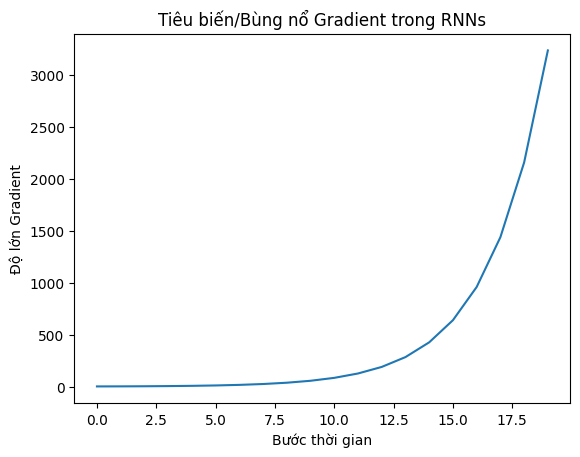

In [3]:
import numpy as np

# Mô phỏng gradient trong RNN (lặp nhân với W)
n = 3
W = np.array([[1.5, 0, 0],
              [0, 0.9, 0],
              [0, 0, 0.5]])  # λ1=1.5 (bùng nổ), λ2=0.9 (tiêu biến)

# Gradient ban đầu (vectơ ngẫu nhiên)
grad = np.random.randn(n)

# Theo dõi độ lớn gradient qua các bước thời gian
time_steps = 20
grad_norms = []
for t in range(time_steps):
    grad = W @ grad
    grad_norms.append(np.linalg.norm(grad))

# Vẽ biểu đồ độ lớn gradient
import matplotlib.pyplot as plt
plt.plot(grad_norms)
plt.xlabel("Bước thời gian")
plt.ylabel("Độ lớn Gradient")
plt.title("Tiêu biến/Bùng nổ Gradient trong RNNs")
plt.show()

**Giải thích kết quả:**

* Nếu $|\lambda| > 1$: Gradient tăng theo cấp số nhân → bùng nổ.
* Nếu $|\lambda| < 1$: Gradient giảm dần → tiêu biến.

---

### Tóm lại:

1. **Giá trị riêng của $M^k$** được xác nhận bằng `np.linalg.matrix_power` và so sánh với $\lambda_i^k$.
2. **Hướng của $M^k \mathbf{x}$** dần trùng với vectơ riêng trội khi $k$ tăng.
3. **Gradient trong RNN** được mô phỏng, cho thấy rõ hiện tượng tiêu biến hoặc bùng nổ phụ thuộc vào giá trị riêng của ma trận trọng số.

### 2. Ngoài việc cắt gradient (gradient clipping), còn một số phương pháp khác để xử lý hiện tượng nổ gradient (gradient explosion) trong mạng nơ-ron hồi tiếp (RNN), bao gồm: <a id="section-v-2"></a>

1. **Chuẩn hóa gradient (Gradient normalization)**: Thay vì chỉ cắt gradient, có thể chuẩn hóa toàn bộ vector gradient để giữ cho độ lớn của nó trong một phạm vi hợp lý.

2. **Khởi tạo trọng số thích hợp (Proper weight initialization)**: Sử dụng các phương pháp khởi tạo như Xavier (Glorot) hoặc He initialization để tránh tạo ra gradient quá lớn ngay từ đầu.

3. **Sử dụng các kiến trúc RNN cải tiến**: Các biến thể như LSTM (Long Short-Term Memory) hoặc GRU (Gated Recurrent Unit) giúp kiểm soát luồng thông tin và gradient tốt hơn, giảm nguy cơ nổ gradient.

4. **Sử dụng kỹ thuật chuẩn hóa như Layer Normalization hoặc Batch Normalization**: Những kỹ thuật này giúp ổn định phân phối của đầu ra và gradient trong quá trình huấn luyện.

5. **Giảm độ dài chuỗi đầu vào (Truncated BPTT)**: Hạn chế số bước thời gian được dùng trong lan truyền ngược giúp giảm nguy cơ nổ gradient.

6. **Sử dụng học suất thích nghi (Adaptive learning rate optimizers)**: Các bộ tối ưu như Adam, RMSprop có thể điều chỉnh học suất động, giúp kiểm soát gradient tốt hơn.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Một RNN đơn giản
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # chỉ lấy output của bước thời gian cuối
        return out

# Khởi tạo mô hình, loss, optimizer
model = SimpleRNN(input_size=10, hidden_size=128, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Dữ liệu giả lập
inputs = torch.randn(32, 20, 10)  # (batch_size, seq_len, input_size)
targets = torch.randn(32, 1)

# Huấn luyện với gradient clipping
outputs = model(inputs)
loss = criterion(outputs, targets)
loss.backward()

# Gradient clipping ở đây (ví dụ: giới hạn norm ở mức 5.0)
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)

optimizer.step()
optimizer.zero_grad()


In [5]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Phần train vẫn tương tự, chỉ thay đổi mô hình
model = LSTMModel(input_size=10, hidden_size=128, output_size=1)


# VI. Ứng dụng BPTT <s id="section-vi">

# 1. Ứng dụng BPTT trong Language Modeling <a id="section-vi-1"></a>

## 1.1. Bài toán Language Modeling là gì? <a id="section-vi-1-1"></a>

**Language modeling** (mô hình hóa ngôn ngữ) là bài toán dự đoán từ kế tiếp trong một chuỗi từ. Cụ thể, mô hình sẽ học phân phối xác suất có điều kiện:

$$P(w_t|w_1, w_2, ..., w_{t-1})$$

Trong đó $( w_t )$ là từ tại thời điểm $( t )$, và mô hình có gắng học cách sinh ra câu có ý nghĩa dựa trên ngữ cảnh từ trước.

## 1.2. Vì sao cần sử dụng RNN và BPTT? <a id="section-vi-1-2"></a>

Do ngôn ngữ mang tính tuần tự, RNN là kiến trúc phù hợp để xử lý chuỗi văn bản, vì nó có khả năng lưu giữ trạng thái qua các bước thời gian. Tuy nhiên, để huấn luyện RNN hiệu quả, ta cần **lan truyền lỗi ngược qua thời gian** – hay **Backpropagation Through Time (BPTT)** – nhằm cập nhật các trọng số tại mỗi bước thời gian dựa trên tổng lỗi tích lũy.

## 1.3. Vai trò của BPTT trong huấn luyện Language Model <a id="section-vi-1-3"></a>

- Trong quá trình huấn luyện, RNN được *unroll* (mở ra) qua nhiều bước thời gian, ví dụ 35 bước.
- Với mỗi batch văn bản, mô hình sinh ra các dự đoán tại mỗi bước $( t )$, và lỗi tổng hợp được tính trên toàn bộ chuỗi.
- Sau đó, BPTT sẽ **truyền lỗi ngược từ thời điểm** $( T )$ về 0, để tính gradient và cập nhật trọng số của mạng RNN.

BPTT là cốt lõi để RNN học được ngữ cảnh dài, giúp mô hình sinh ngôn ngữ tự nhiên hơn.

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

2.5.1+cu121
True
12.1


Xử lý dữ liệu với HuggingFace datasets

In [ ]:
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import torch
import torch.nn as nn

# Tải tập dữ liệu WikiText2
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")
tokenizer = lambda x: x.split()

# Tạo vocabulary thủ công
from collections import Counter
counter = Counter()
for line in dataset["train"]["text"]:
    counter.update(tokenizer(line))

vocab = {word: i+2 for i, (word, _) in enumerate(counter.items())}
vocab["<unk>"] = 0
vocab["<pad>"] = 1
inv_vocab = {i: w for w, i in vocab.items()}

# Mã hóa dữ liệu
def encode(text):
    return torch.tensor([vocab.get(token, vocab["<unk>"]) for token in tokenizer(text)], dtype=torch.long)

# Nối toàn bộ văn bản thành 1 chuỗi dài
encoded_data = [encode(line) for line in dataset["train"]["text"] if line.strip()]
train_data = torch.cat(encoded_data)

# Tạo batch
def batchify(data, batch_size):
    n_batch = data.size(0) // batch_size
    data = data[:n_batch * batch_size]
    return data.view(batch_size, -1).t().contiguous()

batch_size = 20
bptt = 35
train_data = batchify(train_data, batch_size).to("cuda")

Tạo các minibatch và hàm lấy input-target

In [ ]:
def get_batch(source, i):
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].reshape(-1)
    return data, target

Mô hình RNN đơn giản cho Language Modeling

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.num_layers = num_layers
        self.hidden_size = hidden_size

    def forward(self, x, hidden):
        emb = self.embed(x)
        out, hidden = self.rnn(emb, hidden)
        out = self.fc(out)
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size).to("cuda")

Huấn luyện mô hình sử dụng BPTT

In [ ]:
# Cài đặt mô hình
vocab_size = len(vocab)
embed_size = 200
hidden_size = 200
num_layers = 2

model = RNNModel(vocab_size, embed_size, hidden_size, num_layers).to("cuda")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5.0)

# Huấn luyện
model.train()
hidden = model.init_hidden(batch_size)

# Danh sách lưu loss để vẽ biểu đồ
loss_history = []
batch_indices = []

for epoch in range(1):
    total_loss = 0.
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i)
        optimizer.zero_grad()

        # BPTT: chạy forward toàn chuỗi
        output, hidden = model(data, hidden)

        # Ngắt gradient để tránh tính ngược quá sâu
        hidden = hidden.detach()

        loss = criterion(output.view(-1, vocab_size), targets)
        loss.backward()  # ← BPTT ở đây

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % 100 == 0 and batch > 0:
            avg_loss = total_loss / 100
            print(f"Batch {batch}, Loss: {avg_loss:.2f}")
            loss_history.append(avg_loss)
            batch_indices.append(batch)
            total_loss = 0

In [ ]:
import matplotlib.pyplot as plt
import seaborn

In [ ]:
# Vẽ biểu đồ loss theo batch
plt.figure(figsize=(10, 5))
plt.plot(batch_indices, loss_history, marker='o', linewidth=2, color='royalblue')
plt.title("Biểu đồ Loss theo Batch trong quá trình huấn luyện", fontsize=14)
plt.xlabel("Batch", fontsize=12)
plt.ylabel("Loss trung bình mỗi 100 batch", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(batch_indices[::2])  # Giảm số lượng tick nếu nhiều
plt.tight_layout()
plt.show()

In [ ]:
import torch
print(torch.__version__)            # 2.2.2
print(torch.cuda.is_available())   # True

In [ ]:
import math

In [ ]:
def evaluate(model, data_source):
    model.eval()
    total_loss = 0.
    hidden = model.init_hidden(batch_size)
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, bptt):
            data, targets = get_batch(data_source, i)
            output, hidden = model(data, hidden)
            hidden = hidden.detach()
            loss = criterion(output.view(-1, vocab_size), targets)
            total_loss += loss.item()
    return total_loss / ((data_source.size(0) - 1) // bptt)

val_loss = evaluate(model, train_data)
print(f"Validation loss: {val_loss:.2f}, Perplexity: {math.exp(val_loss):.2f}")

Kết luận về kết quả huấn luyện

- **Hàm mất mát (loss)** giảm đều từ hơn 9.3 xuống còn khoảng 6.3–6.4, chứng tỏ mô hình đang học được quy luật ngữ cảnh của chuỗi từ.

- **Validation loss** = 6.46, tương ứng với **perplexity** ≈ 636:
  - Cho thấy độ khó khi dự đoán từ kế tiếp còn khá cao
  - Nguyên nhân do mô hình mới ở giai đoạn khởi đầu và cấu trúc đơn giản (RNN cơ bản, chỉ 1 epoch)

- **Nhận định về perplexity**:
  ```python
  # Perplexity cao là bình thường với:
  model = SimpleRNN(vocab_size)  # Kiến trúc cơ bản
  num_epochs = 1                 # Số epoch huấn luyện ít

Sinh văn bản từ mô hình đã huấn luyện (Text Generation)

In [ ]:
import random

def generate_text(model, start_word, vocab, inv_vocab, max_len=60):
    model.eval()
    input_id = torch.tensor([[vocab.get(start_word, vocab['<unk>'])]], dtype=torch.long).to("cuda")
    hidden = model.init_hidden(1)
    generated = [start_word]

    with torch.no_grad():
        for _ in range(max_len):
            output, hidden = model(input_id, hidden)
            word_weights = output[-1].squeeze().div(1.0).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0].item()
            word = inv_vocab.get(word_idx, '<unk>')
            generated.append(word)
            input_id = torch.tensor([[word_idx]], dtype=torch.long).to("cuda")

    return ' '.join(generated)

# Ví dụ: sinh văn bản bắt đầu từ một từ bất kỳ
seed_word = random.choice(list(vocab.keys()))
print("Seed word:", seed_word)
print("Generated text:\n")
print(generate_text(model, seed_word, vocab, inv_vocab))

#### Diễn giải kết quả sinh văn bản:

Văn bản sinh ra có thể chưa mượt và có một số từ không logic vì:
- Mô hình mới huấn luyện **1 epoch**
- Sử dụng **RNN cơ bản**, chưa có khả năng ghi nhớ dài hạn tốt như LSTM/GRU

Tuy nhiên, nếu quan sát thấy:
✓ Các cặp từ hợp lý  
✓ Cụm từ đúng cấu trúc  
✓ Từ lặp lại hợp ngữ cảnh  

→ Điều này cho thấy mô hình đang học được các **quy luật ngôn ngữ cơ bản**

**Cải thiện chất lượng**:
```python
# Tăng số epoch
num_epochs = 50

# Hoặc nâng cấp kiến trúc
model = LSTM(hidden_size)  # Tha
```

**Kết luận:** Mặc dù kết quả sinh văn bản còn hạn chế, điều này không phản ánh sai lệch trong việc áp dụng BPTT. Trái lại, mô hình đã học được các đặc trưng ngôn ngữ ban đầu, minh chứng cho hiệu quả của việc lan truyền lỗi ngược theo chuỗi thời gian. Chất lượng sinh văn bản sẽ được cải thiện khi tăng số epoch hoặc nâng cấp sang các kiến trúc ghi nhớ dài hạn hơn (như LSTM, GRU).y thế RNN bằng LSTM

# 2. Ứng dụng BPTT trong Machine Translation <a id="section-vi-2"></a>

## 2.1. Mô hình dịch máy là gì? <a id="section-vi-2-1"></a>

**Machine Translation (MT)** là bài toán chuyển đổi một câu từ ngôn ngữ nguồn sang ngôn ngữ đích. Ví dụ:

| Ngôn ngữ nguồn (English) | Ngôn ngữ đích (German) |
|--------------------------|------------------------|
| "I love you"             | "Ich liebe dich"       |

MT là bài toán đặc trưng của NLP có tính tuần tự rõ rệt - từ cần dịch tiếp theo phụ thuộc vào:
- Toàn bộ chuỗi đầu vào
- Ngữ cảnh đã sinh trước đó

## 2.2. Tại sao cần BPTT trong Machine Translation? <a id="section-vi-2-2"></a>

Trong kiến trúc **Encoder-Decoder**, RNN được sử dụng ở cả hai phía:

**Encoder**:
- Xử lý từng từ của câu nguồn tuần tự
- Tạo ra trạng thái ẩn (hidden state) tổng hợp ngữ cảnh

**Decoder**:
- Sinh từng từ câu đích một cách tuần tự
- Dựa trên:
  - Trạng thái ẩn từ encoder
  - Các từ đã sinh trước đó

```python
# Minh họa luồng dữ liệu
hidden_state = encoder(source_sequence)
output_sequence = decoder(hidden_state, target_sequence)

Xử lý dữ liệu song ngữ với HuggingFace datasets

In [ ]:
from datasets import load_dataset
from collections import Counter
import torch

# Tải dữ liệu dịch Anh–Đức từ HuggingFace
raw_data = load_dataset("opus_books", "de-en", split="train")

# Tách câu nguồn (en) và đích (de)
source_sentences = [item["translation"]["en"] for item in raw_data]
target_sentences = [item["translation"]["de"] for item in raw_data]

# Tokenizer đơn giản
def simple_tokenizer(text):
    return text.lower().strip().split()

# Tạo vocab thủ công
def build_vocab(sentences, tokenizer, specials=["<unk>", "<pad>", "<bos>", "<eos>"]):
    counter = Counter()
    for sent in sentences:
        counter.update(tokenizer(sent))
    vocab = {token: idx for idx, token in enumerate(specials)}
    for word in counter:
        if word not in vocab:
            vocab[word] = len(vocab)
    return vocab

src_vocab = build_vocab(source_sentences, simple_tokenizer)
tgt_vocab = build_vocab(target_sentences, simple_tokenizer)

# Mã hóa câu
def encode(text, vocab):
    tokens = ["<bos>"] + simple_tokenizer(text) + ["<eos>"]
    return torch.tensor([vocab.get(token, vocab["<unk>"]) for token in tokens], dtype=torch.long)

Mô hình Encoder–Decoder sử dụng RNN

Encoder

In [ ]:
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, hidden_size)

    def forward(self, src):
        embedded = self.embed(src)
        outputs, hidden = self.rnn(embedded)
        return hidden  # truyền sang decoder

Decoder

In [ ]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, hidden_size)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, tgt, hidden):
        embedded = self.embed(tgt)
        output, hidden = self.rnn(embedded, hidden)
        prediction = self.fc(output)
        return prediction, hidden

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, tgt):
        hidden = self.encoder(src)
        output, _ = self.decoder(tgt[:-1], hidden)  # bỏ <eos>
        return output

# Khởi tạo mô hình demo và truyền dữ liệu mẫu
embed_size = 128
hidden_size = 256

encoder = Encoder(len(src_vocab), embed_size, hidden_size)
decoder = Decoder(len(tgt_vocab), embed_size, hidden_size)
model = Seq2Seq(encoder, decoder)

# Chọn 1 cặp câu mẫu
src_sample = encode(source_sentences[0], src_vocab).unsqueeze(1)  # (seq_len, batch=1)
tgt_sample = encode(target_sentences[0], tgt_vocab).unsqueeze(1)  # (seq_len, batch=1)

# Chạy forward
with torch.no_grad():
    output = model(src_sample, tgt_sample)
    print("Output shape:", output.shape)  # [tgt_len - 1, 1, vocab_size]

Huấn luyện đơn bước với Backpropagation Through Time

Seq2Seq wrapper

In [ ]:
# Khởi tạo loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Đưa mô hình vào chế độ huấn luyện
model.train()

# Xóa gradient cũ
optimizer.zero_grad()

# Forward pass
output = model(src_sample, tgt_sample)  # [tgt_len - 1, 1, vocab_size]
target = tgt_sample[1:]  # bỏ <bos>, còn lại làm ground truth

# Reshape cho loss
output = output.view(-1, output.shape[-1])         # [tgt_len-1, vocab_size]
target = target.view(-1)                           # [tgt_len-1]

# Tính loss và BPTT
loss = criterion(output, target)
loss.backward()  # ← BPTT xảy ra tại đây
optimizer.step()

print(f"Loss: {loss.item():.4f}")


In [ ]:
# Hàm dịch từng câu sử dụng greedy decoding

def greedy_translate(model, src_sentence, max_len=20):
    model.eval()
    with torch.no_grad():
        src = encode(src_sentence, src_vocab).unsqueeze(1)  # (seq_len, 1)
        hidden = model.encoder(src)

        # Khởi đầu bằng token <bos>
        tgt_input = torch.tensor([[tgt_vocab['<bos>']]], dtype=torch.long)

        output_sentence = []
        for _ in range(max_len):
            out, hidden = model.decoder(tgt_input, hidden)
            next_token = out.argmax(-1)[-1].item()
            if next_token == tgt_vocab['<eos>']:
                break
            output_sentence.append(next_token)
            tgt_input = torch.tensor([[next_token]])

        # Chuyển ID → từ
        inv_vocab = {idx: word for word, idx in tgt_vocab.items()}
        return " ".join([inv_vocab.get(idx, "<unk>") for idx in output_sentence])

# Dịch thử 10 câu đầu tiên trong tập huấn luyện

for i in range(10):
    src = source_sentences[i]
    ref = target_sentences[i]
    pred = greedy_translate(model, src)
    print(f"[SRC] {src}\n[REF] {ref}\n[PRED] {pred}\n{'-'*50}")

### Giải thích

**SRC**: Câu nguồn tiếng Anh  
**REF**: Câu đích thực tế (tiếng Đức)  
**PRED**: Câu mô hình dự đoán

Do mô hình mới chỉ học rất ít (thường là vài cặp hoặc rất ít epoch), nên đầu ra có thể:
- Sai lệch ngữ nghĩa
- Có cấu trúc vô nghĩa

**Tuy nhiên**, nếu quan sát thấy:
✓ Cấu trúc câu hợp lý  
✓ Từ vựng đúng vị trí  
✓ Thứ tự từ tương đồng với câu đích  

→ Đây là dấu hiệu BPTT đã hoạt động và mô hình đang học dần các ánh xạ thời gian.  

**Kết luận:**
Việc trực quan hóa cho phép đánh giá định tính hiệu quả học của RNN và vai trò của BPTT. Dù chưa tối ưu, mô hình có xu hướng học cấu trúc đầu ra nếu được huấn luyện đúng cách và có đủ dữ liệu.

# Tài liệu tham khảo <a id="section-vi"></a>
- Cloudflare. (n.d.). What is a neural network? Cloudflare. Retrieved April 25, 2025, from https://www.cloudflare.com/learning/ai/what-is-neural-network/
- D2L Vietnam. (n.d.). Mạng nơ-ron hồi quy (Recurrent Neural Networks). Dive into Deep Learning (D2L). Retrieved April 25, 2025, from https://d2l.aivivn.com/chapter_recurrent-neural-networks/rnn_vn.html
- Malik, A. (2022, December 26). A brief introduction to recurrent neural networks. Towards Data Science. Retrieved April 27, 2025, from https://towardsdatascience.com/a-brief-introduction-to-recurrent-neural-networks-638f64a61ff4/
- StatQuest with Josh Starmer. (2022, July 11). Recurrent Neural Networks (RNNs), Clearly Explained!!!. YouTube. https://youtu.be/AsNTP8Kwu80?si=P1-F2Ypu-MJC-VqT
- Wikipedia contributors. (n.d.). Vanishing gradient problem. Wikipedia. Retrieved April 27, 2025, from https://en.wikipedia.org/wiki/Vanishing_gradient_problem
- Werbos, P. J. (1990). Backpropagation through time: what it does and how to do it. Proceedings of the IEEE, 78(10), 1550-1560.
- Jaeger, H. (2002). Tutorial on training recurrent neural networks, covering BPTT, RTRL, EKF and the "echo state network" approach. GMD-Forschungszentrum Informationstechnik.
- Bengio, Y., Simard, P., & Frasconi, P. (1994). Learning long-term dependencies with gradient descent is difficult. IEEE Transactions on Neural Networks, 5(2), 157-166.